<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-to-test-basic-functionalities" data-toc-modified-id="Notebook-to-test-basic-functionalities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook to test basic functionalities</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Simple-backtests-with-and-without-transaction-costs" data-toc-modified-id="Simple-backtests-with-and-without-transaction-costs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple backtests with and without transaction costs</a></span><ul class="toc-item"><li><span><a href="#Signals-on-SP500" data-toc-modified-id="Signals-on-SP500-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Signals on SP500</a></span></li><li><span><a href="#Backtest-without-transaction-costs" data-toc-modified-id="Backtest-without-transaction-costs-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Backtest without transaction costs</a></span></li><li><span><a href="#With-transaction-costs" data-toc-modified-id="With-transaction-costs-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>With transaction costs</a></span></li><li><span><a href="#One-more-example-with-transaction-costs" data-toc-modified-id="One-more-example-with-transaction-costs-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>One more example with transaction costs</a></span></li></ul></li><li><span><a href="#Backtest-of-two-years,-using-2-different-combinations-of-MA-crossover" data-toc-modified-id="Backtest-of-two-years,-using-2-different-combinations-of-MA-crossover-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Backtest of two years, using 2 different combinations of MA crossover</a></span><ul class="toc-item"><li><span><a href="#Performance-of-each-year-individually:" data-toc-modified-id="Performance-of-each-year-individually:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Performance of each year individually:</a></span></li><li><span><a href="#Performance-of-both-time-periods-together" data-toc-modified-id="Performance-of-both-time-periods-together-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Performance of both time periods together</a></span></li><li><span><a href="#Checking-'Strat_position'-and-'Costs'-of-last-days-of-year-1,-and-first-days-of-year-2" data-toc-modified-id="Checking-'Strat_position'-and-'Costs'-of-last-days-of-year-1,-and-first-days-of-year-2-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Checking 'Strat_position' and 'Costs' of last days of year 1, and first days of year 2</a></span></li></ul></li><li><span><a href="#Walk-forward-optimization." data-toc-modified-id="Walk-forward-optimization.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Walk forward optimization.</a></span></li><li><span><a href="#Save-results" data-toc-modified-id="Save-results-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Save results</a></span></li></ul></li></ul></div>

# Notebook to test basic functionalities

### Imports

In [11]:
# Settings for notebook visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;text-align: center;vertical-align: middle;} </style>""")

In [12]:
# Necessary imports
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import quantstats as qs
from datetime import datetime, timedelta
print("Libraries imported correctly")

Libraries imported correctly


In [13]:
os.chdir("/Users/Sergio/Documents/Master_QF/Thesis/Code/Algorithmic Strategies")
%run Functions.ipynb

### Data

In [14]:
ini_equity_default = 100
commision_default = 2/130000 + 12.5/130000 #0.000111538462, around 0.011..% of the equity

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23311 entries, 1928-01-03 to 2020-10-20
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             23311 non-null  float64
 1   Market_daily_ret  23311 non-null  float64
dtypes: float64(2)
memory usage: 546.4 KB


Close  Market_daily_ret
Date                                     
2020-10-14  3488.669922         -0.006623
2020-10-15  3483.340088         -0.001528
2020-10-16  3483.810059          0.000135
2020-10-19  3426.919922         -0.016330
2020-10-20  3443.120117          0.004727

<AxesSubplot:title={'center':'SP500'}, xlabel='Date'>

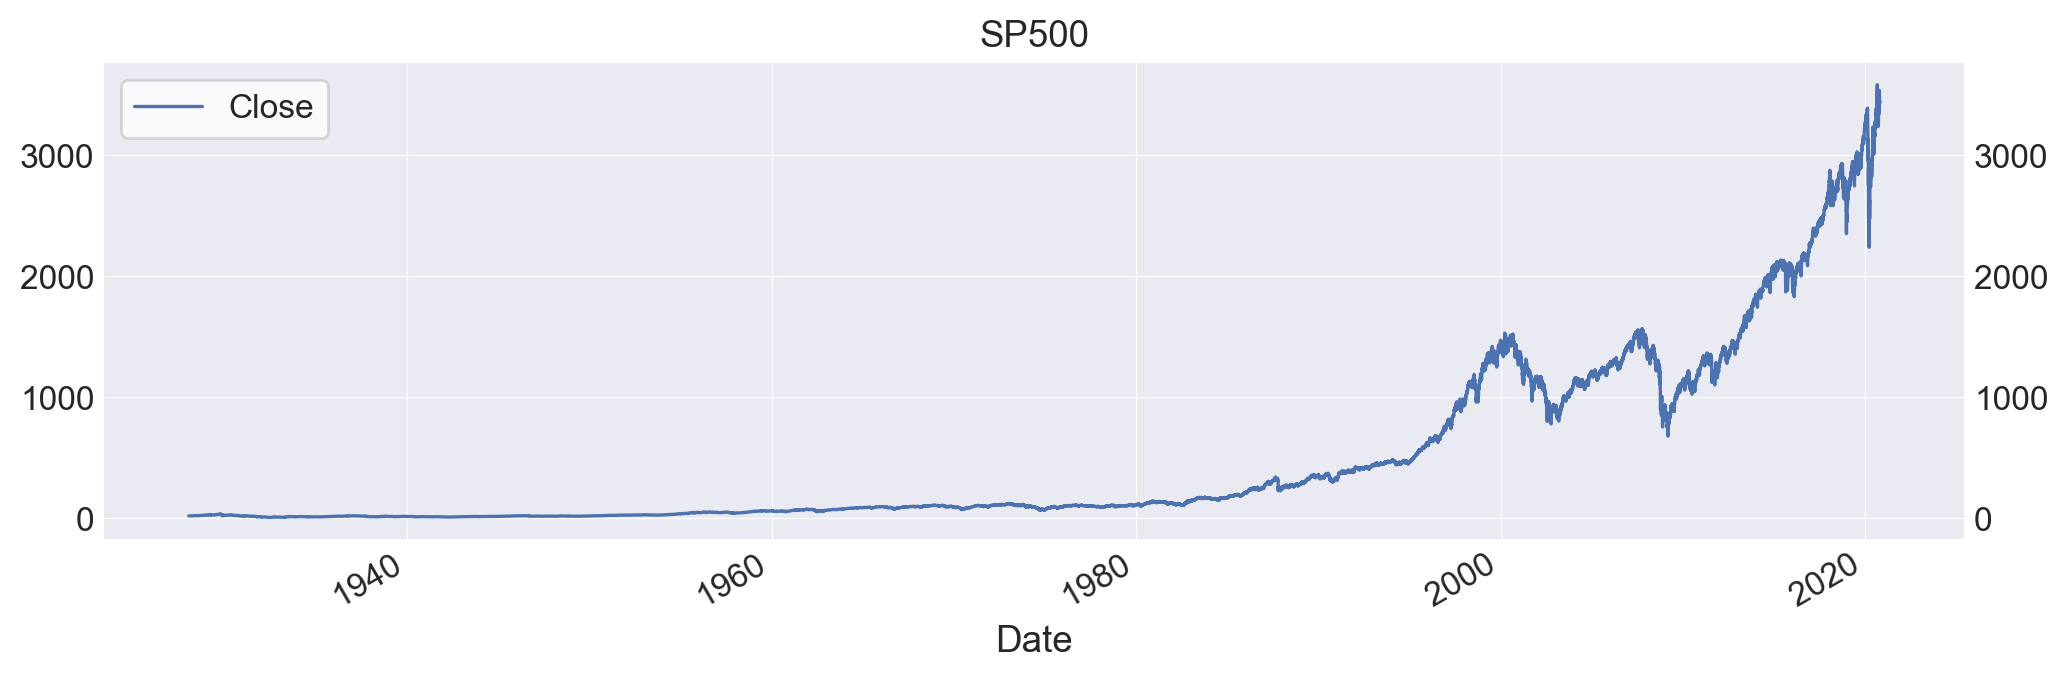

In [15]:
%run Functions.ipynb

#data = get_sp500_data(from_local_file=False, save_to_file=True)
data = get_sp500_data(from_local_file=True, save_to_file=False)
data = data[['Open', 'Close']]

data['Market_daily_ret'] = data['Close'].pct_change().fillna((data['Close']-data['Open'])/data['Open'])
data = data[['Close', 'Market_daily_ret']]

data.info()
data.tail()
data['Close'].plot(title='SP500', legend=True)

## Simple backtests with and without transaction costs

The purpose of this section is to check backtests based on Moving Average crossovers. There are 3 subsections:  
- Signals on SP500. This will allow to see how MA crossovers produce buy/sell signals when different MA crossovers occur.
- Backtest without transaction costs: It allows to see how buy/sell signals affect returns from the strategy.
- Backtest with transaction costs: It allows to see the effect of transaction costs on returns from the strategy.

These are two backtests from 2018-01-01 to 2019-12-31. This first one is done without transaction costs, and the second one adds a transaction cost every time the strategy changes the position.  

Using the MAs of 75 and 200 periods, there are two crosses. On 2018-12-26 and 2019-04-24. 'Strat_position' changing at the Close of that day will cause the strategy to switch the position on the market. This change is added at the end of such days, when we would send the change of position to the broker.   

In order words, if this strategy was live trading, it uses the price a few minutes before the end of the trading day as the Close price, to take the decision about whether to change the position or not. This change in position has transaction costs, which affects the returns of such days.

In [16]:
date_fmt = '%Y-%m-%d'
first_day = datetime.strptime('2018-01-01', date_fmt)
last_day = datetime.strptime('2019-12-31', date_fmt)
fast_ma = 75
slow_ma = 200
# fast_ma = 25 # Change to this parameters to see more changes in Strat_position
# slow_ma = 40

### Signals on SP500

Close  Market_daily_ret      fast_ma      slow_ma        diff  long_signal  exit_signal
Date                                                                                                     
2018-01-02  2695.810059          0.008303  2590.054017  2483.772007  106.282010         True        False
2018-01-03  2713.060059          0.006399  2592.891751  2485.469957  107.421794        False        False
2018-01-04  2723.989990          0.004029  2595.826683  2487.369807  108.456876        False        False

Close  Market_daily_ret      fast_ma      slow_ma      diff  long_signal  exit_signal
Date                                                                                                   
2019-04-22  2907.969971          0.001012  2757.802656  2767.312898 -9.510242        False        False
2019-04-23  2933.679932          0.008841  2764.279857  2768.298247 -4.018390        False        False
2019-04-24  2927.250000         -0.002192  2769.550658  2769.135397  0.415261         True        False
2019-04-25  2926.169922         -0.000369  2774.570391  2769.845397  4.724994        False        False

<Figure size 2400x700 with 0 Axes>

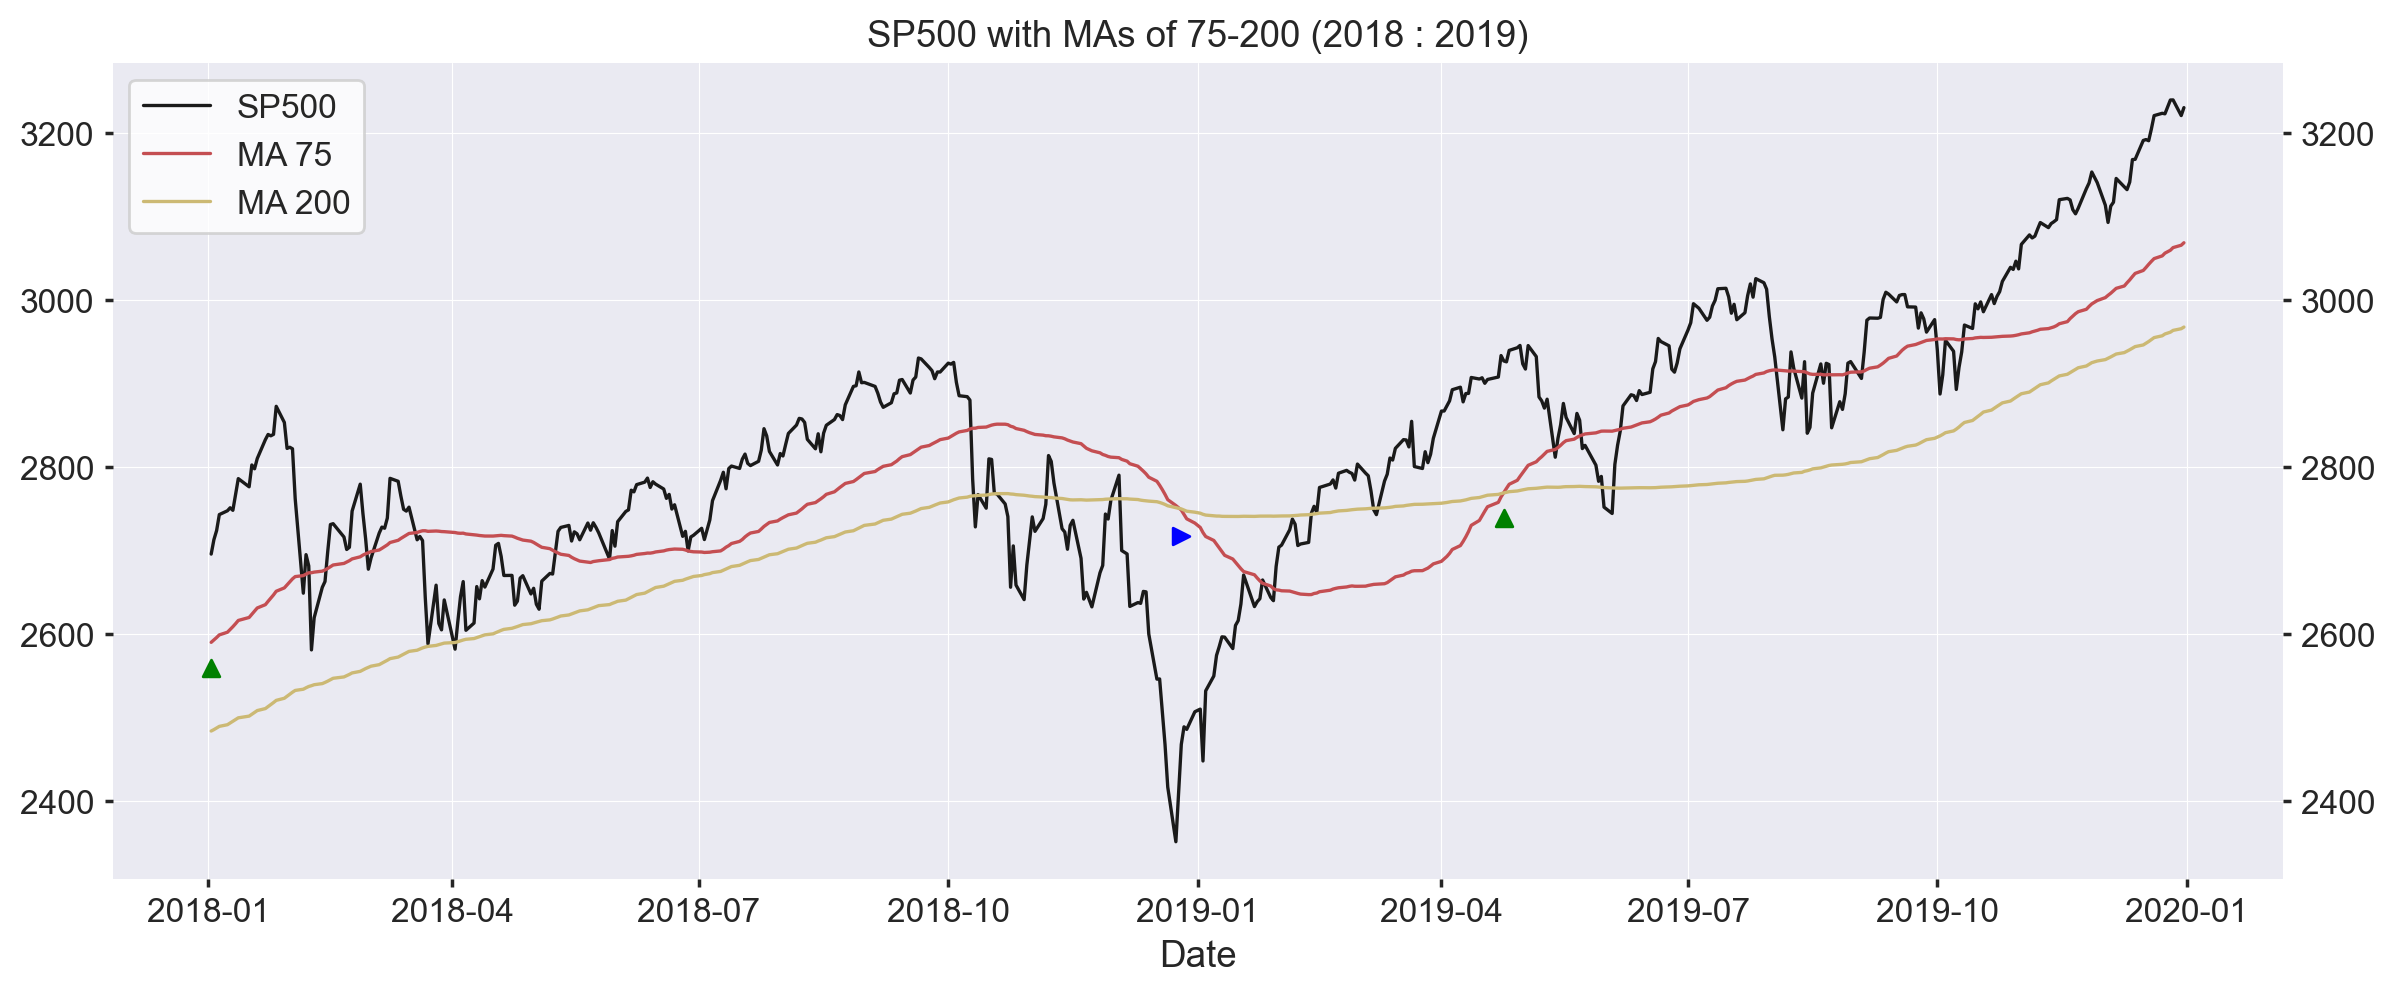

In [17]:
%run Functions.ipynb
df = data.loc[first_day:last_day].copy()

plot_sp500_with_ma_signals(df, fast_ma=fast_ma, slow_ma=slow_ma)
df.head(3)
df['2019-04-20':'2019-04-25']

### Backtest without transaction costs

This allows to test a moving average crossover strategy. Useful to see how a backtest is done and columns from the final dataframe after doing the backtest: 
 - Close: Close price of the benchmark. 
 - Market_daily_ret: daily percentage returns of the benchmark. Calculated from the previous Close price to the actual Close price. 
 - ***Strat_position***: **This is the most important column from the backtest. Daily returns, cummulative returns and costs are calculated after the strategy position is defined**. Refers to the position that we have AT THE END of such day. If the Strat_position changes from the previous day, we add transaction costs to the strategy. Calculated based on moving averages.   
 - Strat_daily_ret: daily percentage returns of the strategy. Calculated from the previous Close price to the actual Close price. 
> Strat_daily_ret = Market_daily_ret * Strat_position.shift() * (1-commission)  
> Note: commission is paid if Strat_position != Strat_position.shift()
 - Costs: Daily transaction costs in USD - . (This is the trickiest part of the whole framework. It´s easier to see the final dataframe to check that it works). Formula:
>  Costs (in USD) = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (commission)
 - Long_only: Refers to open a Buy&Hold position. This is useful for the walk-formard optimisization. It is set to 1 when B&H strategy performed better than all tested parameters In Sample.
 - Market_cum_ret: Market cummulative returns. This is proportional to the Close price of the benchmark, starting at a price of initial_equity
> If initial_equity is set to the initial price of the benchmark, Market_cum_ret = Close
 - Strat_cum_ret: Strategy cummulative return. Built from 'Strat_daily_ret' and starting with a price of initial_equity.
> Strat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)

In [18]:
loc = data.index.get_loc(df.index[0])
ini_money = data.iloc[loc - 1]['Close'] # We assume we can buy at the Close of the previous day to the start of the backtest
#ini_money = 100

previous_position=1

fast_ma = 75
slow_ma = 200

Backtest without transaction costs: 
ini_money = 2673.61
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. IR of SP500: nan
	Overall return of 75-200 MA crossover: 101.87 %. IR strategy: 0.71

First three days: 
	We can see how we had entered the market before the first day (because previous_position=1).
	And since costs = 0:
	On 2018-01-03, Strat_cum_ret = 2695.810059 * [1+[0.006399*1.0]] = 2713.060059


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303         0.008303             1.0    0.0          0     2695.810059    2695.810059
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0          0     2713.060059    2713.060059
2018-01-04  2723.989990          0.004029         0.004029             1.0    0.0          0     2723.989990    2723.989990


At the end of 2018-12-26 there is a change of Strat_position from 1.0 to 0.0: 
	And since costs = 0:
	On 2018-12-26, Strat_cum_ret = 2351.100098 * [1+[0.049594*1.0]] * [1-Costs] = 2467.699951  (Closing the position didn´t cost us anything)
	On 2018-12-27, Strat_cum_ret = 2467.699951 * [1+[0.008563*0.0]] = 2467.699951


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-12-21  2416.620117         -0.020588        -0.020588             1.0    0.0          0     2416.620117    2416.620117
2018-12-24  2351.100098         -0.027112        -0.027112             1.0    0.0          0     2351.100098    2351.100098
2018-12-26  2467.699951          0.049594         0.049594             0.0    0.0          0     2467.699951    2467.699951
2018-12-27  2488.830078          0.008563         0.000000             0.0    0.0          0     2488.830078    2467.699951


At the end of 2019-04-24 there is a change of Strat_position from 0.0 to 1.0: 
	And since costs = 0:
	On 2019-04-24, Strat_cum_ret = 2467.699951 * [1+[-0.002192*0.0]] * [1-Costs] = 2467.699951  (Opening a position didn´t cost us anything)
	On 2019-04-25, Strat_cum_ret = 2467.699951 * [1+[-0.000369*1.0]] = 2466.789435


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2019-04-22  2907.969971          0.001012         0.000000             0.0    0.0          0     2907.969971    2467.699951
2019-04-23  2933.679932          0.008841         0.000000             0.0    0.0          0     2933.679932    2467.699951
2019-04-24  2927.250000         -0.002192         0.000000             1.0    0.0          0     2927.250000    2467.699951
2019-04-25  2926.169922         -0.000369        -0.000369             1.0    0.0          0     2926.169922    2466.789435

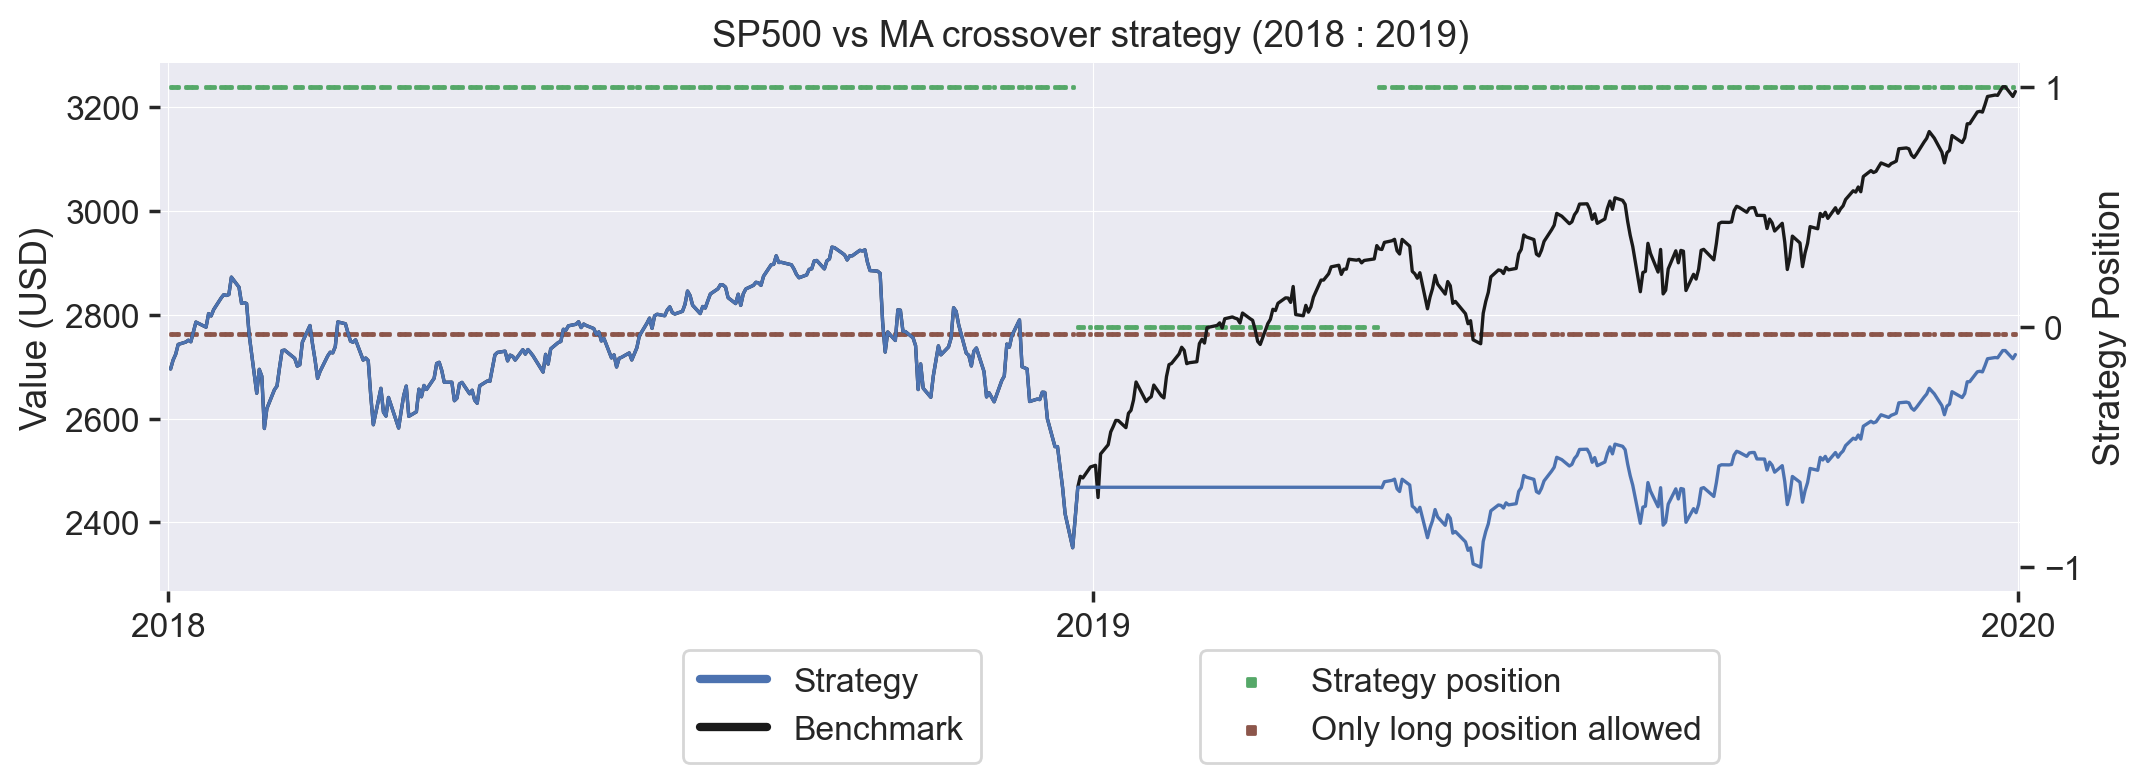

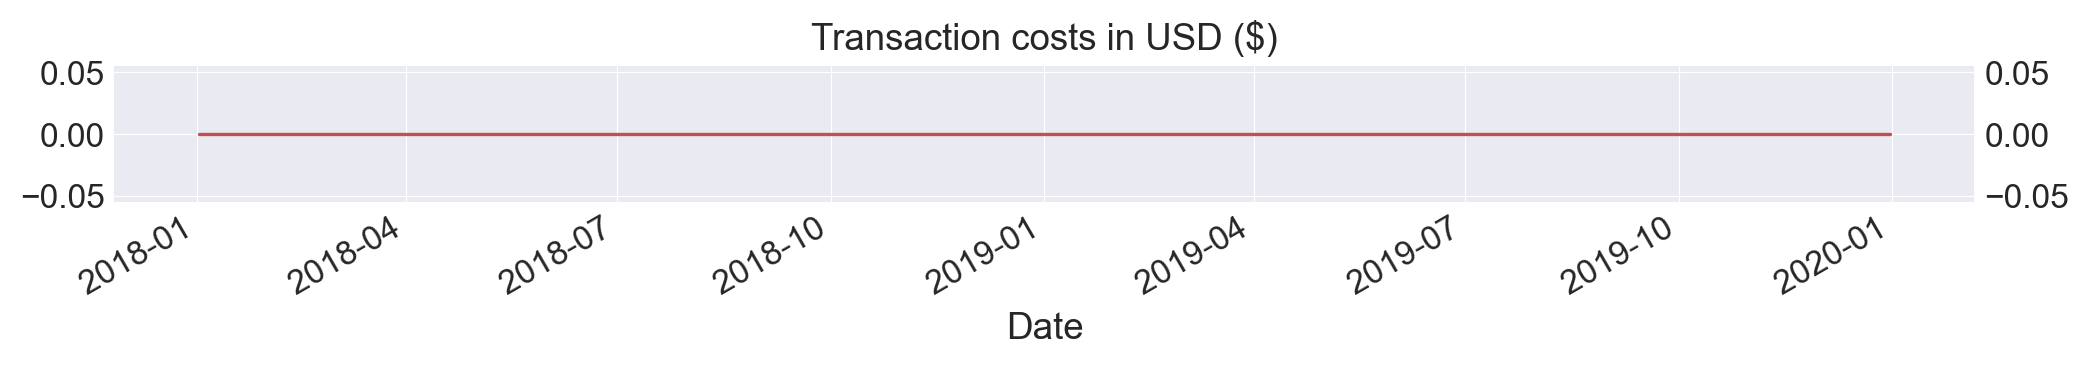

In [19]:
%run Functions.ipynb
df = data[first_day:last_day].copy()

print("Backtest without transaction costs: \nini_money = {:.2f}".format(ini_money))
df = backtest_print_plot(df, fast_ma=fast_ma, slow_ma=slow_ma, previous_position=previous_position, ini_equity=ini_money, commision=0, legend=True)

print("\nFirst three days: \n\tWe can see how we had entered the market before the first day (because previous_position=1).\n\t"
        "And since costs = 0:\n\t"
        "On 2018-01-03, Strat_cum_ret = 2695.810059 * [1+[0.006399*1.0]] = 2713.060059")
df.head(3)

print("\nAt the end of 2018-12-26 there is a change of Strat_position from 1.0 to 0.0: \n\t"
        "And since costs = 0:\n\t"
        "On 2018-12-26, Strat_cum_ret = 2351.100098 * [1+[0.049594*1.0]] * [1-Costs] = 2467.699951  (Closing the position didn´t cost us anything)\n\t"  
        "On 2018-12-27, Strat_cum_ret = 2467.699951 * [1+[0.008563*0.0]] = 2467.699951")
df.loc['2018-12-21':'2018-12-27'] # Change of Strat_position from 1 to 0

print("\nAt the end of 2019-04-24 there is a change of Strat_position from 0.0 to 1.0: \n\t"
        "And since costs = 0:\n\t"
        "On 2019-04-24, Strat_cum_ret = 2467.699951 * [1+[-0.002192*0.0]] * [1-Costs] = 2467.699951  (Opening a position didn´t cost us anything)\n\t"  
        "On 2019-04-25, Strat_cum_ret = 2467.699951 * [1+[-0.000369*1.0]] = 2466.789435")
df.loc['2019-04-22':'2019-04-25'] # Change of Strat_position from 0 to 1

plt.show()
_ = df['Costs'].plot(title='Transaction costs in USD ($)', figsize=(12,1), color='r')

### With transaction costs

We test how a transaction costs on the backtest affects 'Costs', and therefore, 'Strat_daily_ret' and 'Strat_cum_ret'. We can see change in 'Strat_position' on 2018-12-26 and 2019-04-24. <br><br>
We can also see how previous_position has an effect on the 'Costs' of the first day. previous_position refers to the position that we had in the market on the previous day to the start of the strategy. This parameter is set to 0 by default, and it will be useful for the walk-forward optimization, in which we may end a period_t adn strat a period_t+1 being long on the market, which would safe us transaction costs from selling and buying.<br><br>

A very high commision of 0.50 (50% of the actual equity for entering a position) shows well how transaction costs work in the backtest. Two aspects are worth being checked in this specific test:
- We can see how we loose 50% of the capital on the days that we change the position on the market (2018-12-26 and 2019-04-24). 
- The only difference between first and second backtest is the _previous_position_ parameter. 
    1. In the first backtest we are initially with previous_position=0, which means that we are out of the market. Since our strategy tells us to enter the market from the first day, we have to pay a transaction costs of 50% of our capital, and we can see that reflected on 'Costs', 'Strat_daily_ret', and 'Strat_cum_ret'.
    2. In the second backtest we are initially with previous_position=1, which means that we have a buy position in the market. Since our strategy tells us to keep long in the market from the first day, we don´t have to pay a transaction costs. We can see the difference with the previous case on 'Costs', 'Strat_daily_ret', and 'Strat_cum_ret'.

In [20]:
loc = data.index.get_loc(df.index[0])
#ini_money = data.iloc[loc - 1]['Close'] # We assume we can buy at the Close of the previous day to the start of the backtest
ini_money = 100 # So its easier to calculate transaction costs
commision = 0.5

fast_ma = 75
slow_ma = 200

# HERE

Backtest with transaction costs and previous position in the market = 0: 
ini_money = 100.00
		Strat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. IR of SP500: nan
	Overall return of 75-200 MA crossover: 12.73 %. IR strategy: -1.23


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303        -0.495848             1.0   50.0          0      100.830336      50.415168
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0          0      101.475531      50.737766
2018-01-04  2723.989990          0.004029         0.004029             1.0    0.0          0      101.884339      50.942170

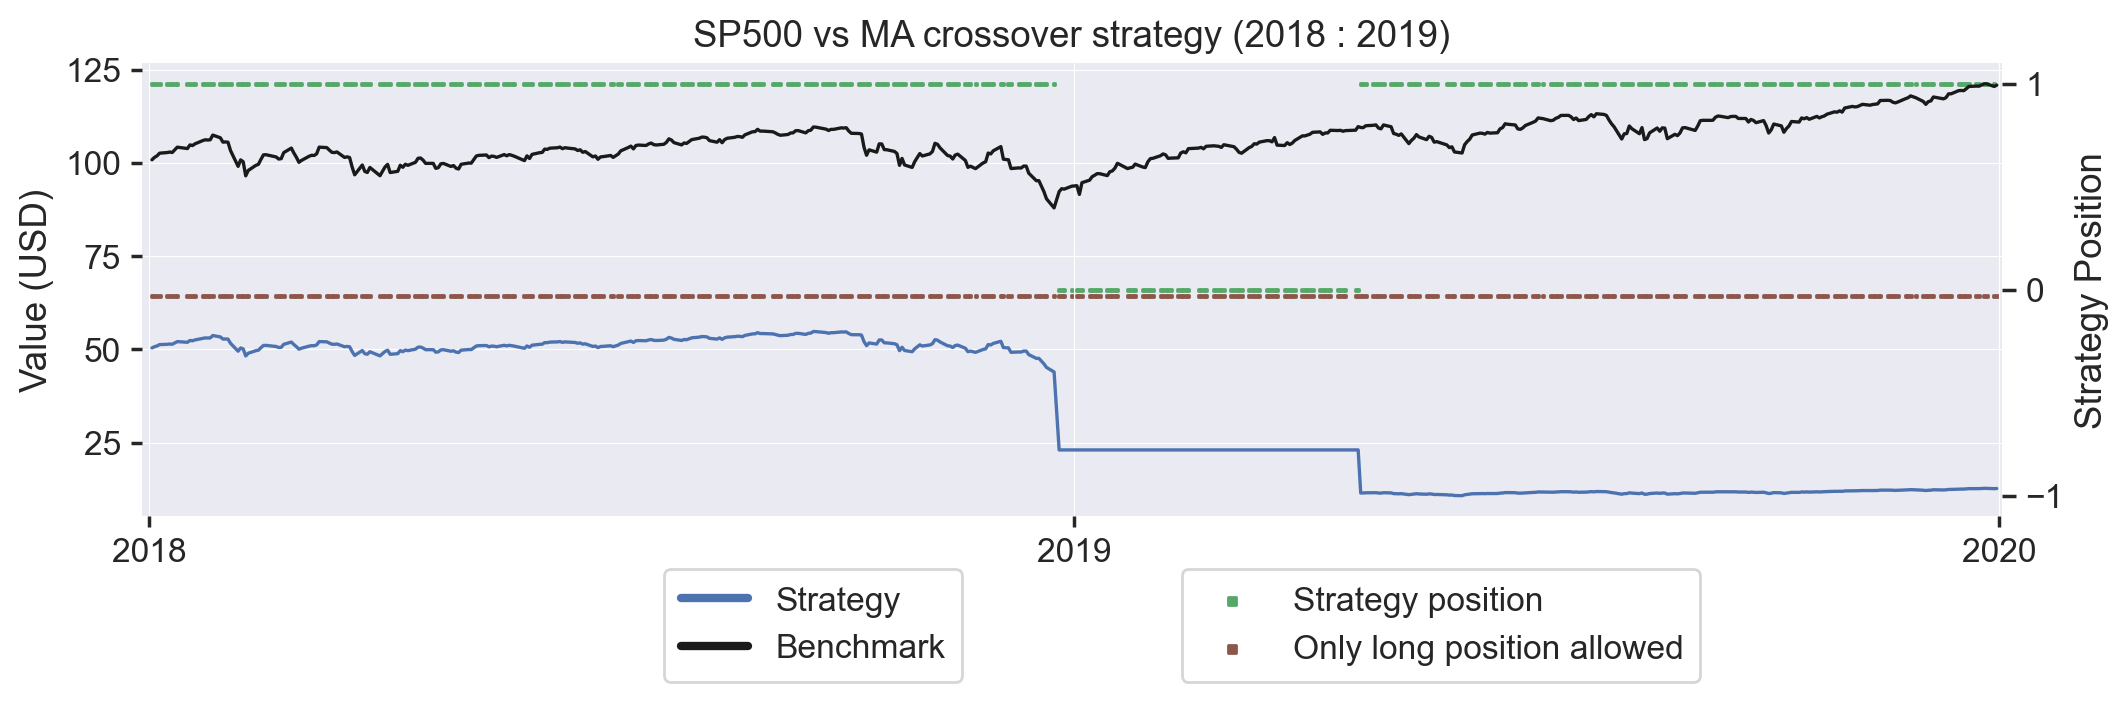

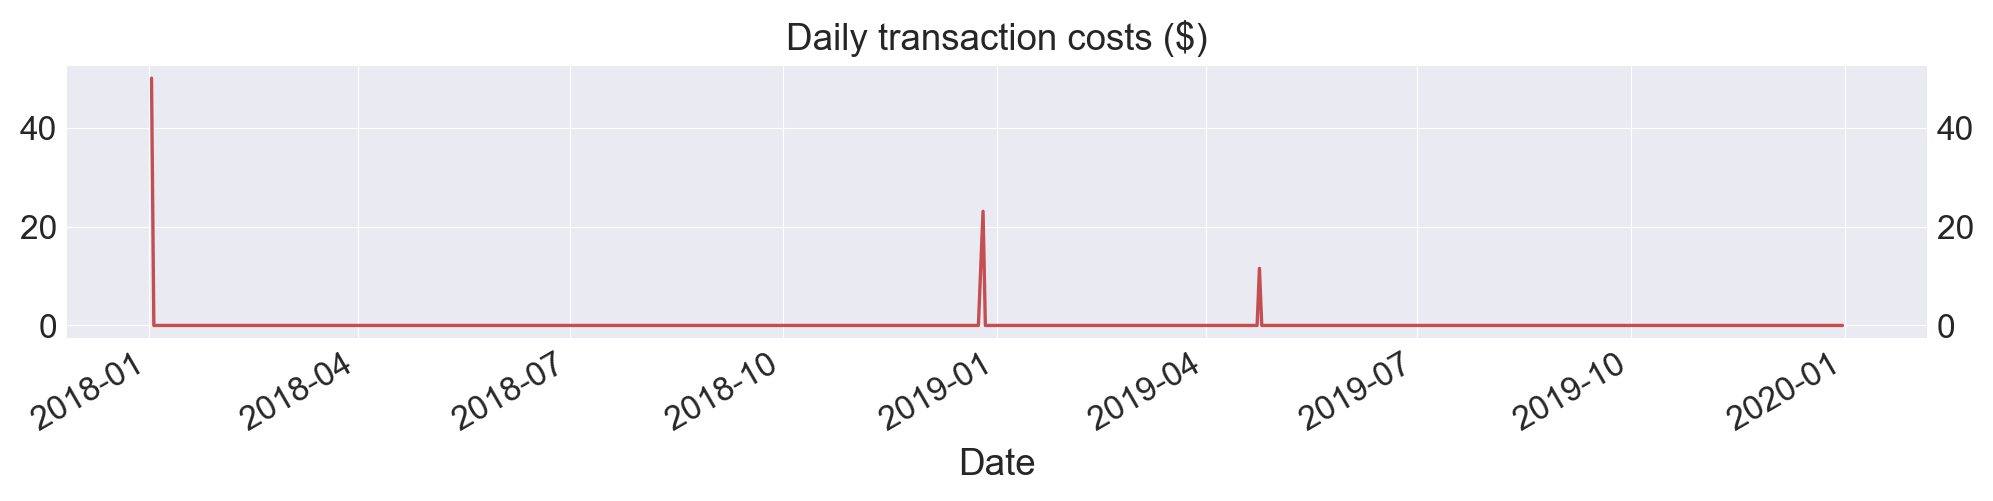

<AxesSubplot:xlabel='Date'>

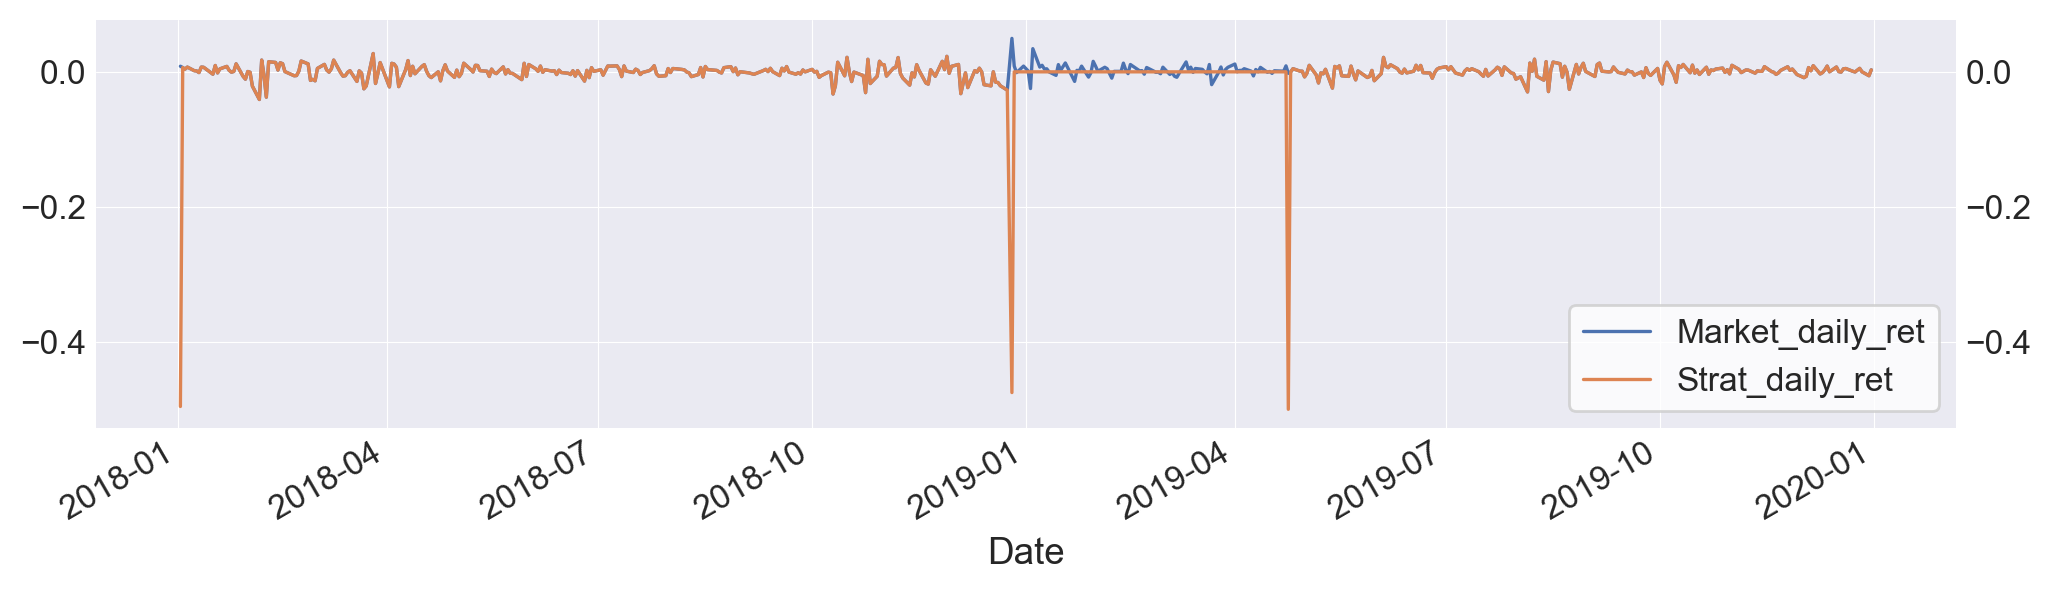

Backtest with transaction costs and previous position in the market = 1: 
ini_money = 100.00
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. IR of SP500: nan
	Overall return of 75-200 MA crossover: 25.47 %. IR strategy: -1.00


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303         0.008303             1.0    0.0          0      100.830336     100.830336
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0          0      101.475531     101.475531
2018-01-04  2723.989990          0.004029         0.004029             1.0    0.0          0      101.884339     101.884339

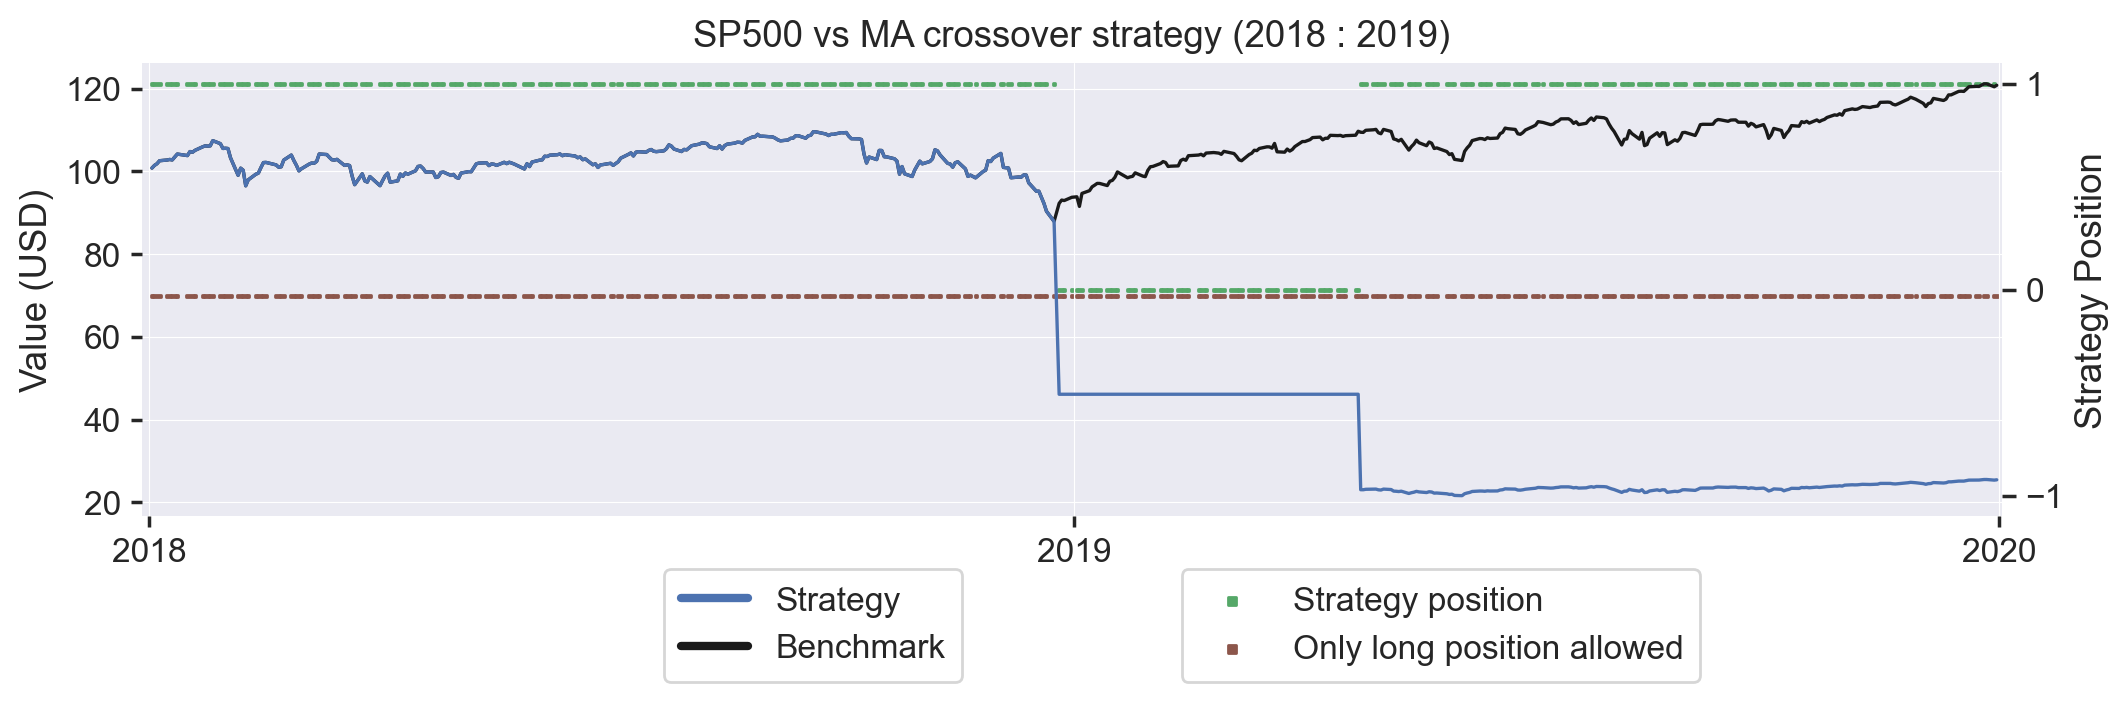

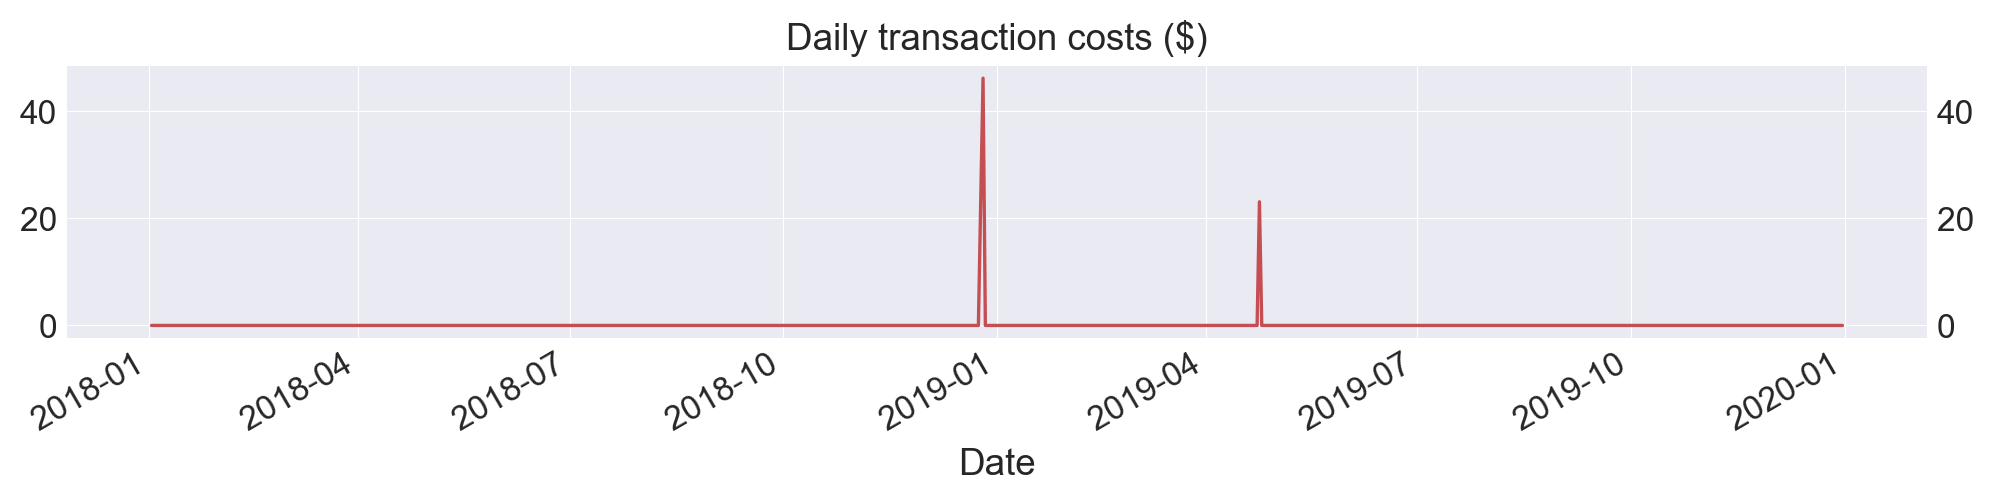

<AxesSubplot:xlabel='Date'>

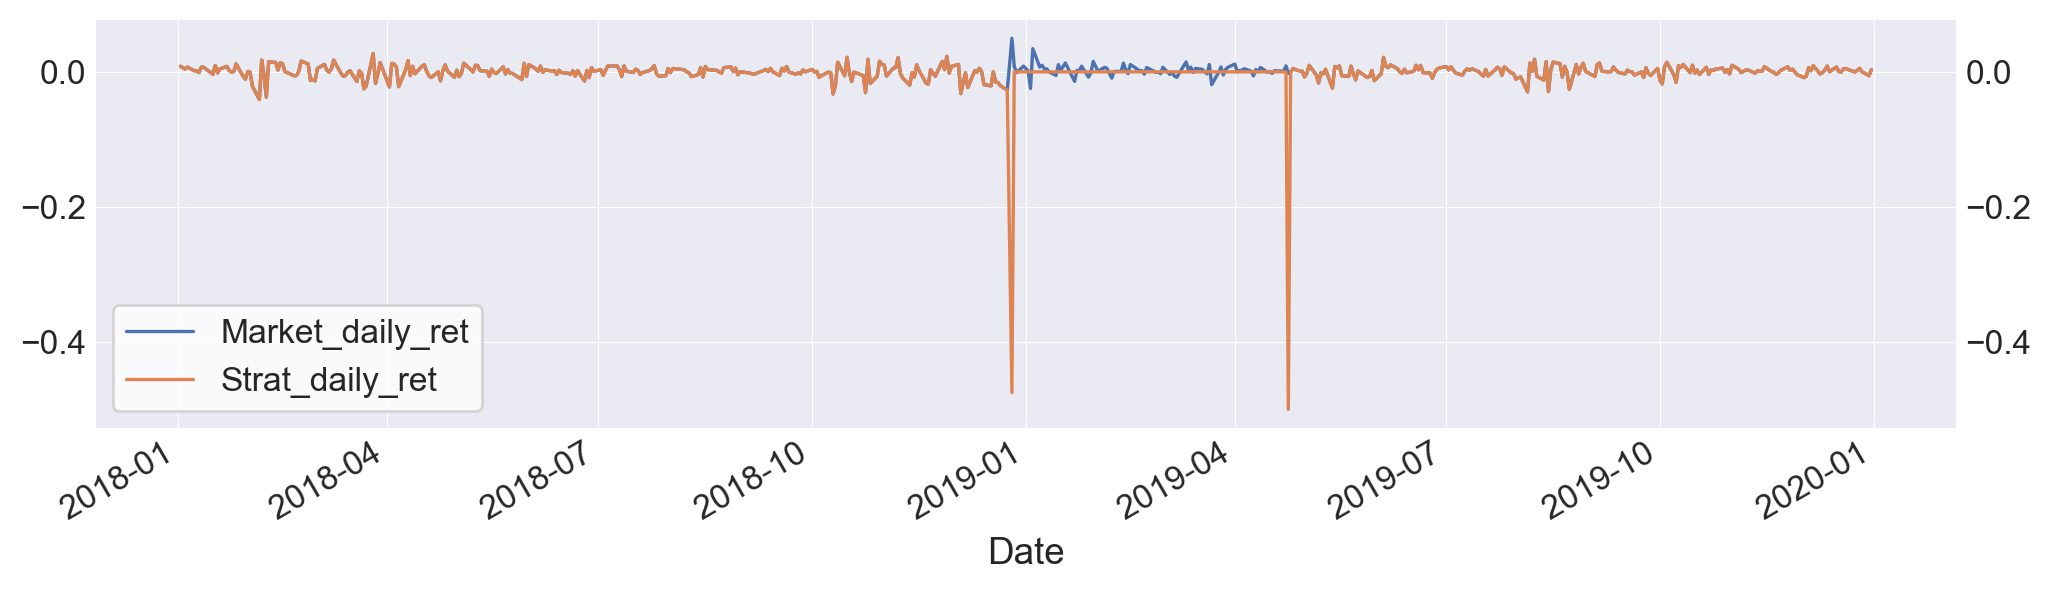

In [21]:
%run Functions.ipynb
df = data[first_day:last_day].copy()

print("Backtest with transaction costs and previous position in the market = 0: \nini_money = {:.2f}".format(ini_money))
print("\t\tStrat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)")

df = backtest_print_plot(df, fast_ma=fast_ma, slow_ma=slow_ma, previous_position=0, ini_equity=ini_money, commision=commision, figsize=(12,3), legend=True)
df.head(3)
plt.show()
_ = df['Costs'].plot(title='Daily transaction costs ($)', figsize=(12,2), color='r')
plt.show()

df[['Market_daily_ret', 'Strat_daily_ret']].plot(figsize=(12,3))
plt.show()

print("Backtest with transaction costs and previous position in the market = 1: \nini_money = {:.2f}".format(ini_money))
df = backtest_print_plot(df, fast_ma=fast_ma, slow_ma=slow_ma, previous_position=1, ini_equity=ini_money, commision=commision, figsize=(12,3), legend=True)
df.head(3)
plt.show()
_ = df['Costs'].plot(title='Daily transaction costs ($)', figsize=(12,2), color='r')
plt.show()

df[['Market_daily_ret', 'Strat_daily_ret']].plot(figsize=(12,3))

#df.iloc[[0,1,2,-2,-1]]
# df.loc['2018-12-21':'2018-12-27']
# df.loc['2019-04-22':'2019-04-25']

### One more example with transaction costs

More realistic commision, but still big (and visible in the plot): 1%

In [22]:
loc = data.index.get_loc(df.index[0])
ini_money = data.iloc[loc - 1]['Close'] # We assume we can buy at the Close of the previous day to the start of the backtest
#ini_money = 100
commision = 0.01

previous_position = 1

Backtest with transaction costs: 
ini_money = 2673.61
		Strat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. IR of SP500: nan
	Overall return of 75-200 MA crossover: 99.84 %. IR strategy: 0.70

First three days: 
	We can see how we had entered the market before the first day (because previous_position=1).
	And since costs = 0:
	On 2018-01-03, Strat_cum_ret = 2695.810059 * [1+[0.006399*1.0]] = 2713.060059


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303         0.008303             1.0    0.0          0     2695.810059    2695.810059
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0          0     2713.060059    2713.060059
2018-01-04  2723.989990          0.004029         0.004029             1.0    0.0          0     2723.989990    2723.989990


At the end of 2018-12-26 there is a change of Strat_position from 1.0 to 0.0: 
	And since costs = 0:
	On 2018-12-26, Strat_cum_ret = 2351.100098 * [1+[0.049594*1.0]] * [1-0.01] = 2443.022952  (Closing the position cost us 1% of the equity at the end of 2018-12-26)
				Costs = 2351.100098 * [1+[0.049594*1.0]] * [0.01] = 24.677
	On 2018-12-27, Strat_cum_ret = 2443.022952 * [1+[0.008563*0.0]] = 2443.022952


Close  Market_daily_ret  Strat_daily_ret  Strat_position   Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                        
2018-12-21  2416.620117         -0.020588        -0.020588             1.0   0.000          0     2416.620117    2416.620117
2018-12-24  2351.100098         -0.027112        -0.027112             1.0   0.000          0     2351.100098    2351.100098
2018-12-26  2467.699951          0.049594         0.039098             0.0  24.677          0     2467.699951    2443.022952
2018-12-27  2488.830078          0.008563         0.000000             0.0   0.000          0     2488.830078    2443.022952


At the end of 2019-04-24 there is a change of Strat_position from 0.0 to 1.0: 
	And since commission = 0.01:
	On 2019-04-24, Strat_cum_ret = 2467.699951 * [1+[-0.002192*0.0]] * [1-Costs] = 2443.022952  (Opening the position cost us 1% of the equity at the end of 2019-04-24)
	On 2019-04-25, Strat_cum_ret = 2443.022952 * [1+[-0.000369*1.0]] = 2443.022952


Close  Market_daily_ret  Strat_daily_ret  Strat_position     Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                          
2019-04-22  2907.969971          0.001012         0.000000             0.0   0.00000          0     2907.969971    2443.022952
2019-04-23  2933.679932          0.008841         0.000000             0.0   0.00000          0     2933.679932    2443.022952
2019-04-24  2927.250000         -0.002192        -0.010000             1.0  24.43023          0     2927.250000    2418.592722
2019-04-25  2926.169922         -0.000369        -0.000369             1.0   0.00000          0     2926.169922    2417.700325

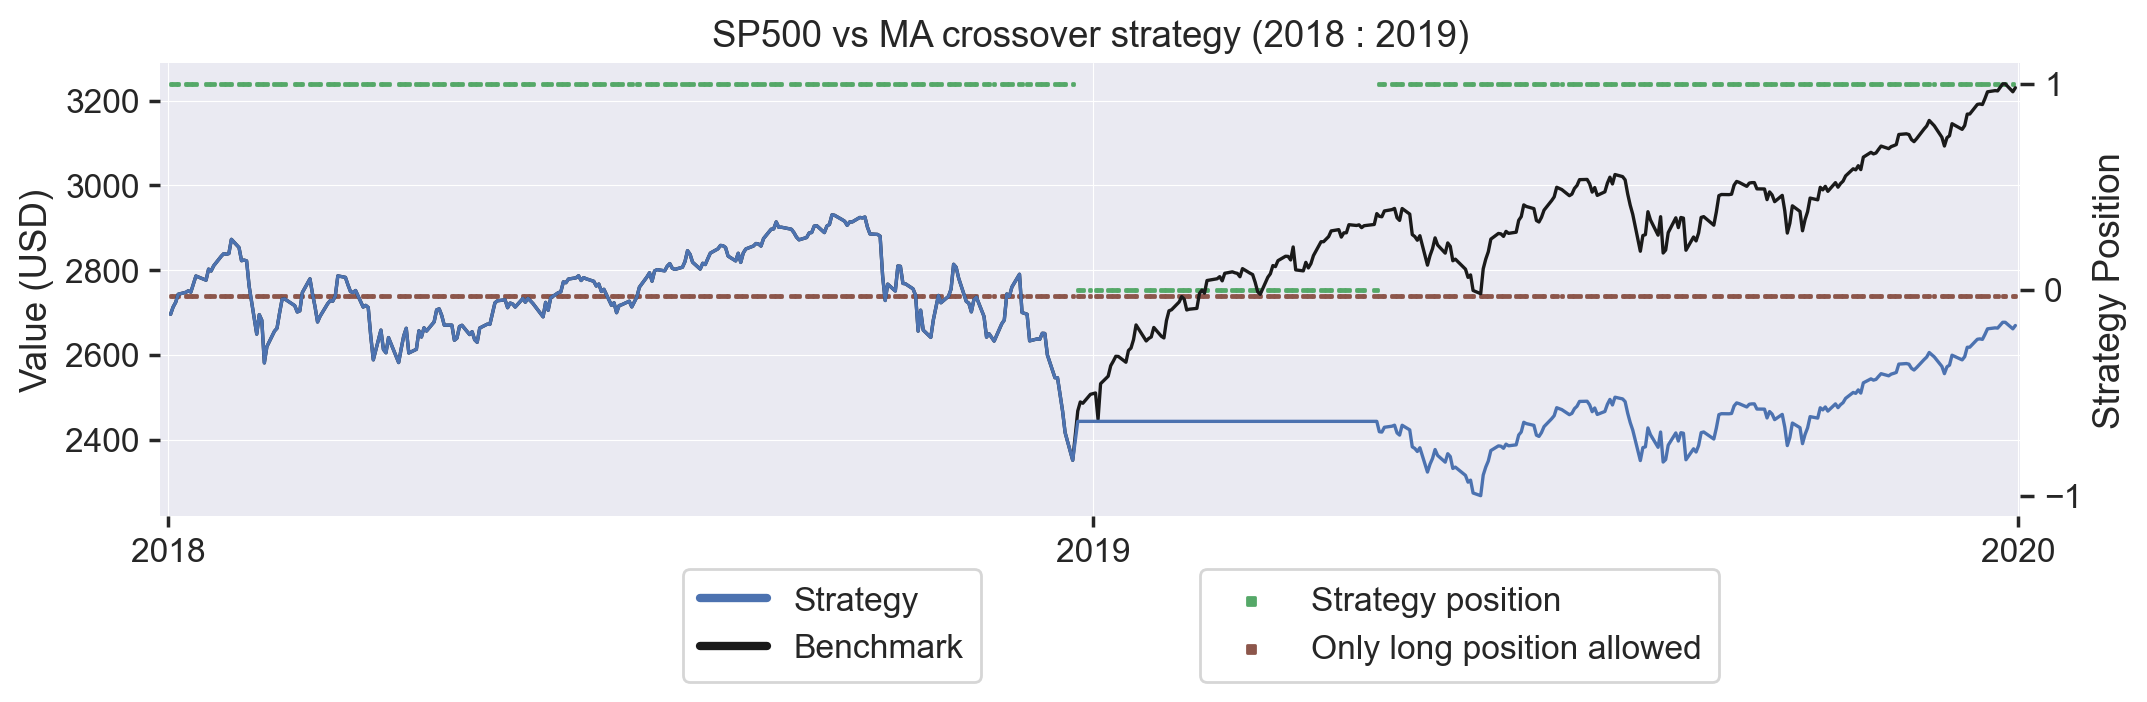

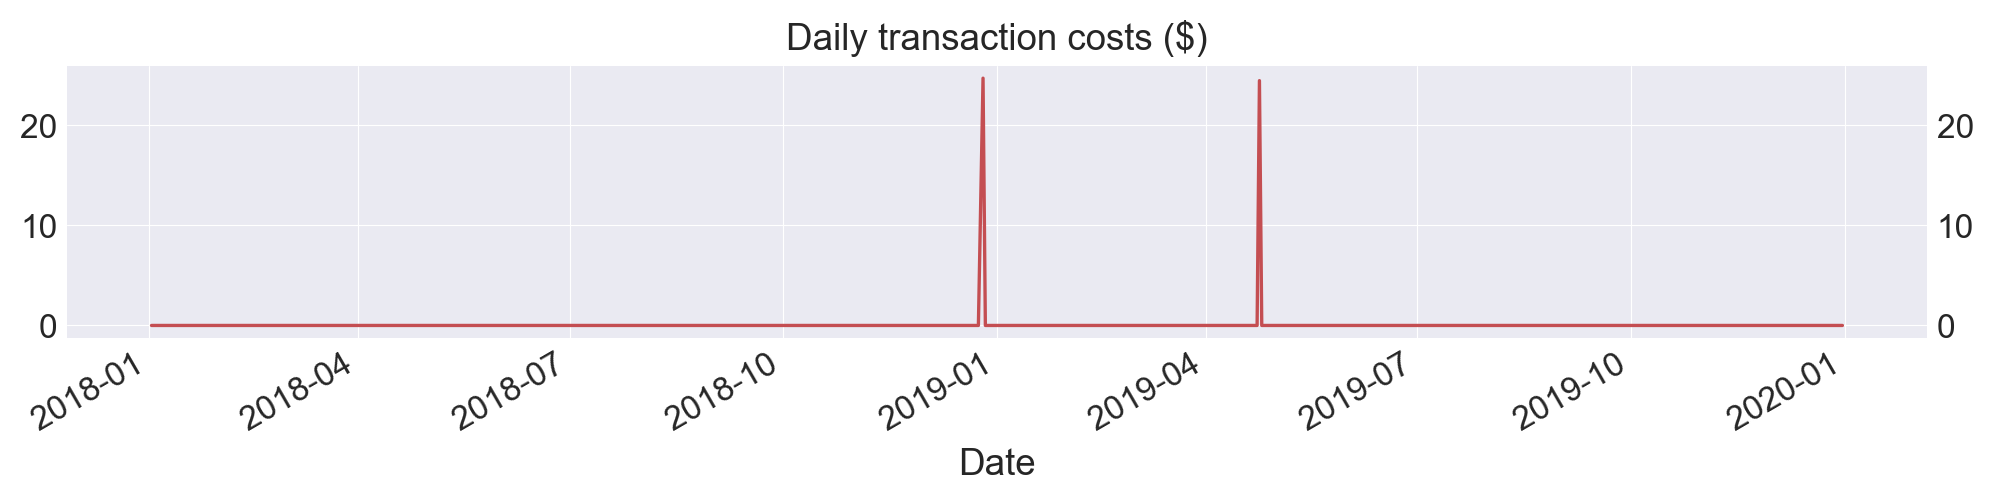

<AxesSubplot:xlabel='Date'>

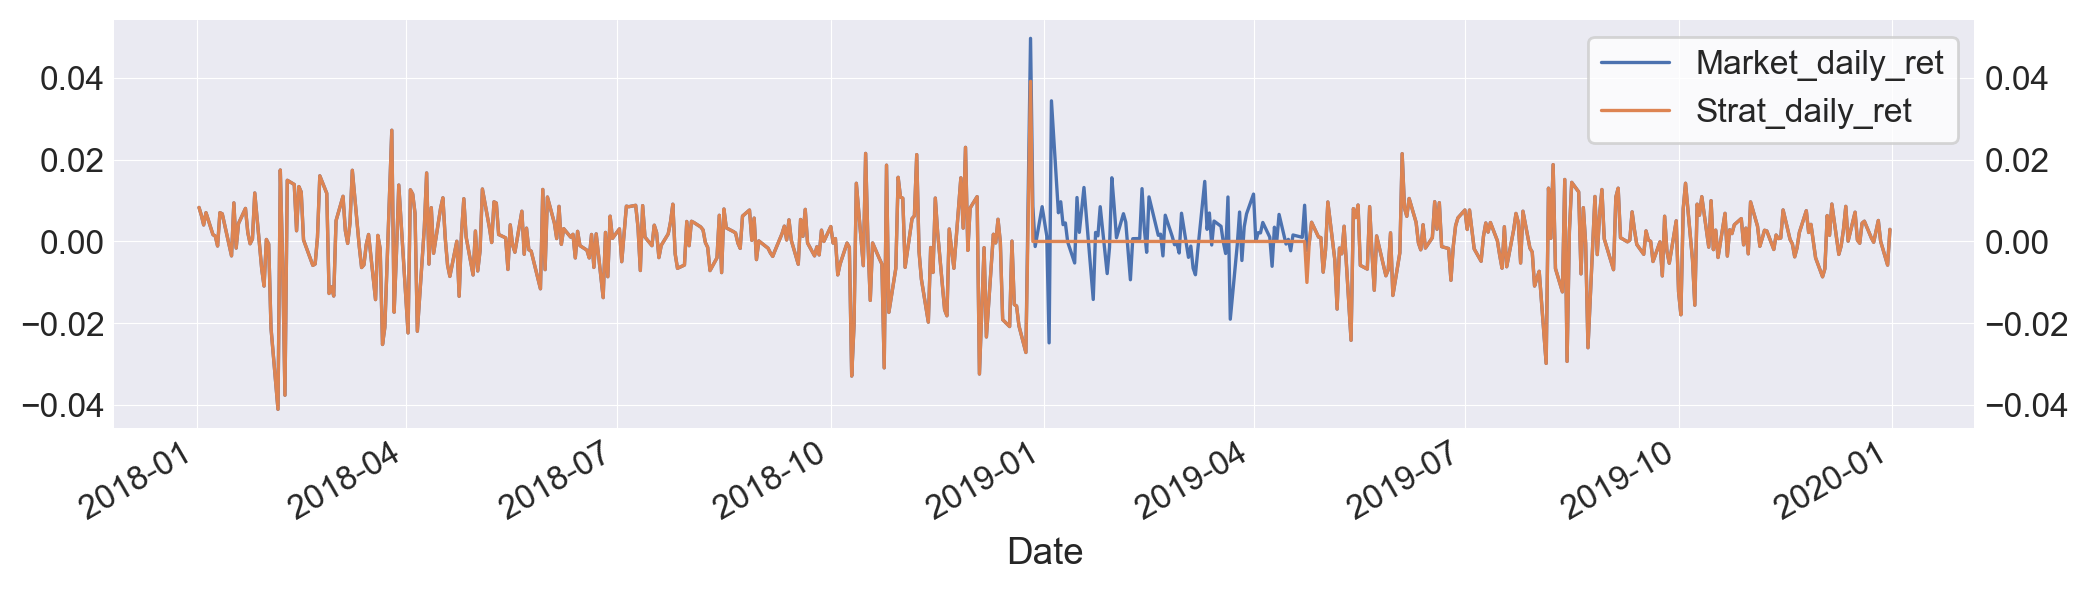

In [23]:
%run Functions.ipynb
df = data[first_day:last_day].copy()

print("Backtest with transaction costs: \nini_money = {:.2f}".format(ini_money))
print("\t\tStrat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)")

df = backtest_print_plot(df, fast_ma=fast_ma, slow_ma=slow_ma, previous_position=previous_position, ini_equity=ini_money, commision=commision, figsize=(12,3), legend=True)

print("\nFirst three days: \n\tWe can see how we had entered the market before the first day (because previous_position=1).\n\t"
        "And since costs = 0:\n\t"
        "On 2018-01-03, Strat_cum_ret = 2695.810059 * [1+[0.006399*1.0]] = 2713.060059")
df.head(3)

print("\nAt the end of 2018-12-26 there is a change of Strat_position from 1.0 to 0.0: \n\t"
        "And since costs = 0:\n\t"
        "On 2018-12-26, Strat_cum_ret = 2351.100098 * [1+[0.049594*1.0]] * [1-0.01] = 2443.022952  (Closing the position cost us 1% of the equity at the end of 2018-12-26)\n\t"  
                          "\t\t\tCosts = 2351.100098 * [1+[0.049594*1.0]] * [0.01] = 24.677\n\t"
          "On 2018-12-27, Strat_cum_ret = 2443.022952 * [1+[0.008563*0.0]] = 2443.022952")
df.loc['2018-12-21':'2018-12-27'] # Change of Strat_position from 1 to 0

print("\nAt the end of 2019-04-24 there is a change of Strat_position from 0.0 to 1.0: \n\t"
        "And since commission = 0.01:\n\t"
        "On 2019-04-24, Strat_cum_ret = 2467.699951 * [1+[-0.002192*0.0]] * [1-Costs] = 2443.022952  (Opening the position cost us 1% of the equity at the end of 2019-04-24)\n\t"  
        "On 2019-04-25, Strat_cum_ret = 2443.022952 * [1+[-0.000369*1.0]] = 2443.022952")
df.loc['2019-04-22':'2019-04-25'] # Change of Strat_position from 0 to 1

plt.show()

_ = df['Costs'].plot(title='Daily transaction costs ($)', figsize=(12,2), color='r')
#_ = df['Costs_in_pct'].mul(df['Strat_cum_ret']).plot(title='Daily transaction costs (%)', figsize=(12,2), color='r')
plt.show()
df[['Market_daily_ret', 'Strat_daily_ret']].plot(figsize=(12,3))
plt.show()

# df.iloc[[0,1,2,-2,-1]]
# df.loc['2018-12-21':'2018-12-27']

## Backtest of two years, using 2 different combinations of MA crossover

This is useful to see the result of doing two backtests with different parameters on two different periods. Finally those periods are merged together.


This is a backtest from 2018-01-01 to 2019-12-31. Each year will have a different combination of MAs.  
- 2018: will be long all the time.  
- 2019: will use fast_ma=75 and slow_ma=200.

1st year finishes with a long position, and 2nd year starts with a neutral position. This will be useful to see again that 'Strat_position' and 'Costs' are calculated and added correctly to the overall performance.

### Performance of each year individually:

The purpose of each plots is:  
1. See performance of Market and Long only strategy during 2018. 'Strat_position' and  'Long_only' are always 1.  
2. See performance of Market and MA (75-200) strategy during 2019. See how 'Strat_position' comes from 0 and changes to 1 on the first day.

Period: 2018-01-02 to 2018-12-31
	Overall return of SP500: 93.76 %. IR of SP500: nan
	Overall return of long only: 93.76 %. IR strategy: nan. 
Period: 2019-01-02 to 2019-12-31
	Overall return of SP500: 128.88 %. IR of SP500: nan
	Overall return of 75-200 MA crossover: 110.34 %. IR strategy: 0.28


Close  Market_daily_ret  Strat_daily_ret  Strat_position     Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                          
2018-01-02  2695.810059          0.008303         0.008191             1.0  0.011154          1      100.830336      100.81909

Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-12-31  2506.850098          0.008492         0.008492             NaN    0.0          1        93.76274      93.752282

93.76274015037922

Close  Market_daily_ret  Strat_daily_ret  Strat_position     Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                          
2019-01-02  2510.030029          0.001268        -0.000112             0.0  0.010471          0       93.881678      93.752282

Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2019-12-31  3230.780029          0.002946         0.002946             NaN    0.0          0       120.83961     103.462026

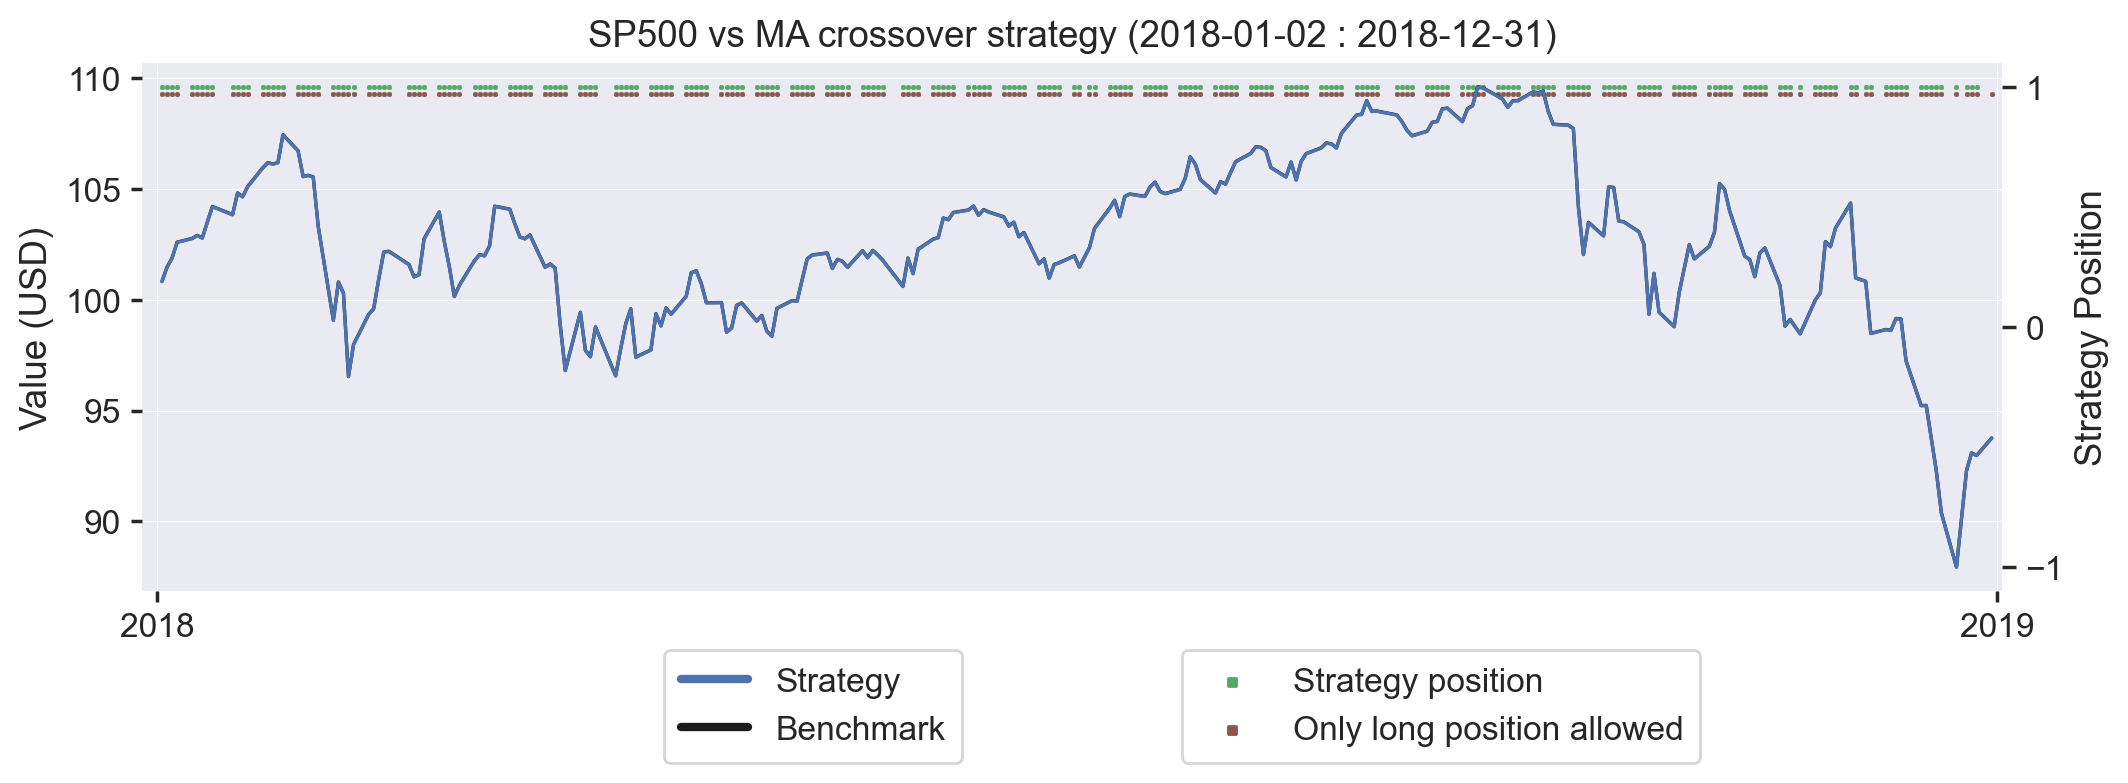

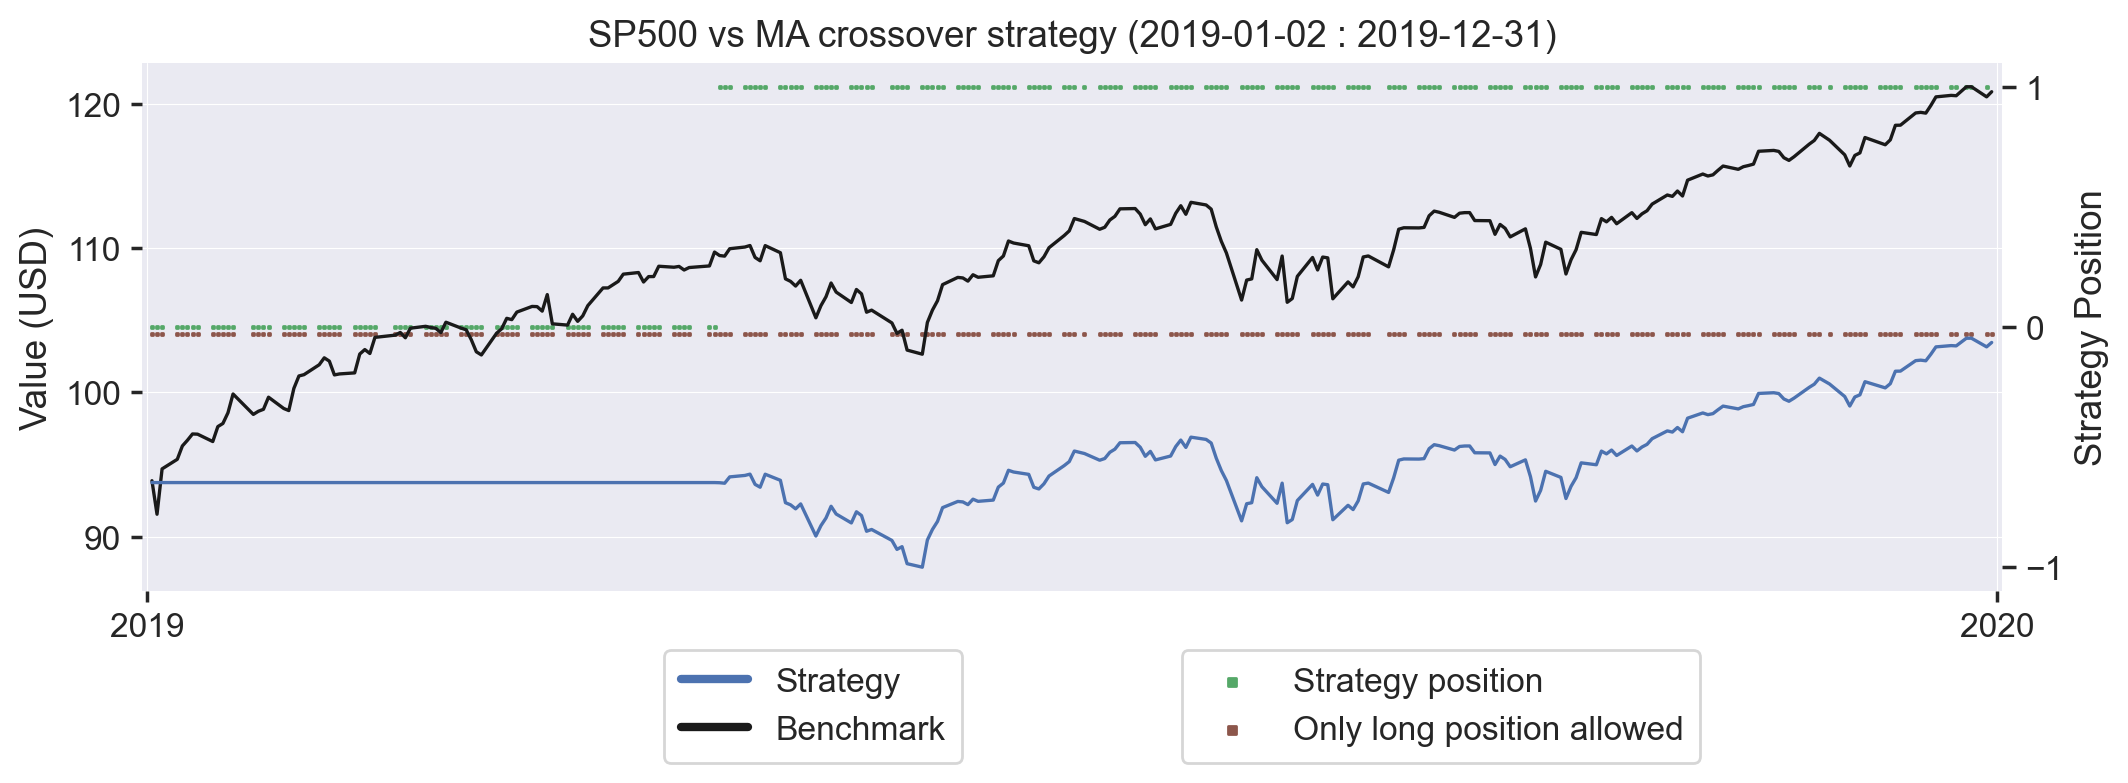

In [24]:
%run Functions.ipynb
df = data[first_day:last_day].copy()
commision = commision_default

cols = ['Strat_daily_ret', 'Strat_position', 'Costs', 'Long_only', 'Market_cum_ret', 'Strat_cum_ret']
tmp_df = pd.DataFrame(columns=cols)

df_year_1 = df.loc[str(first_day.year)].copy()
df_year_2 = df.loc[str(last_day.year)].copy()

#  Get returns of each strategy for each year
df_year_1 = backtest_print_plot(df_year_1, fast_ma=0, slow_ma=0, previous_position=0, commision=commision, legend=True)
last_position = df_year_1.loc[df_year_1.index[-2], 'Strat_position'] # Position during the last day
last_equity = df_year_1.loc[df_year_1.index[-1], 'Market_cum_ret']
# last_equity = 100

df_year_2 = backtest_print_plot(df_year_2, previous_position=last_position, fast_ma=75, slow_ma=200, ini_equity=last_equity, commision=commision, legend=True)

# Put together both periods
tmp_df = pd.concat([df_year_1, df_year_2], axis=0)

#  Add all obtained columns in the original df
df = pd.concat([df, tmp_df[cols]], axis=1)

# To see details of the output
df[str(df_year_1.index[0].year)].head(1)
df[str(df_year_1.index[0].year)].tail(1)
last_equity
df[str(df_year_2.index[0].year)].head(1)
df[str(df_year_2.index[0].year)].tail(1)

# df_year_1[['Strat_position', 'Long_only']].plot()
# df_year_1[['Costs']].plot()
# df_year_2[['Costs']].plot()

### Performance of both time periods together

The purpose of each plots is:  
1. Show previous plots concatenated. See that 'Strat_position' and 'Long_only' change properly in the beggining of 2019
2. Subplots to see how the changes in the strategy position affect 'Long_only', 'Strat_position', and 'Costs'

Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. SR of SP500: 0.71
	Overall return of our strategy: 101.94 %. Sharpe ratio strategy: 0.13


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>], dtype=object)

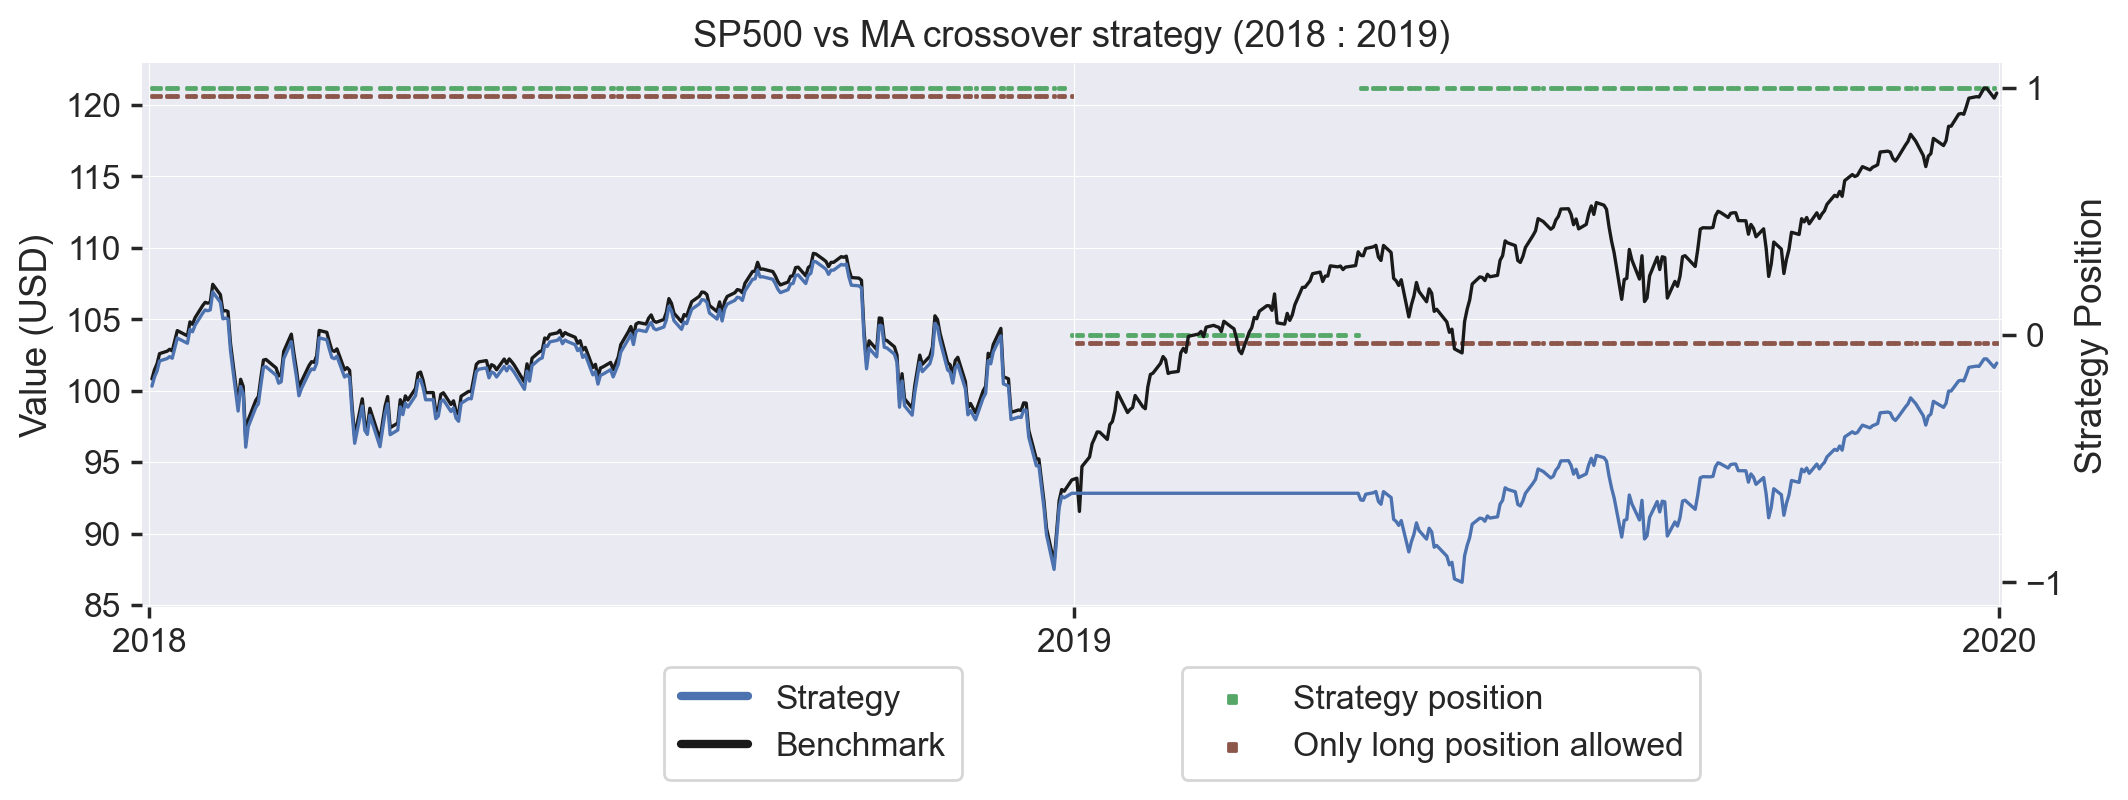

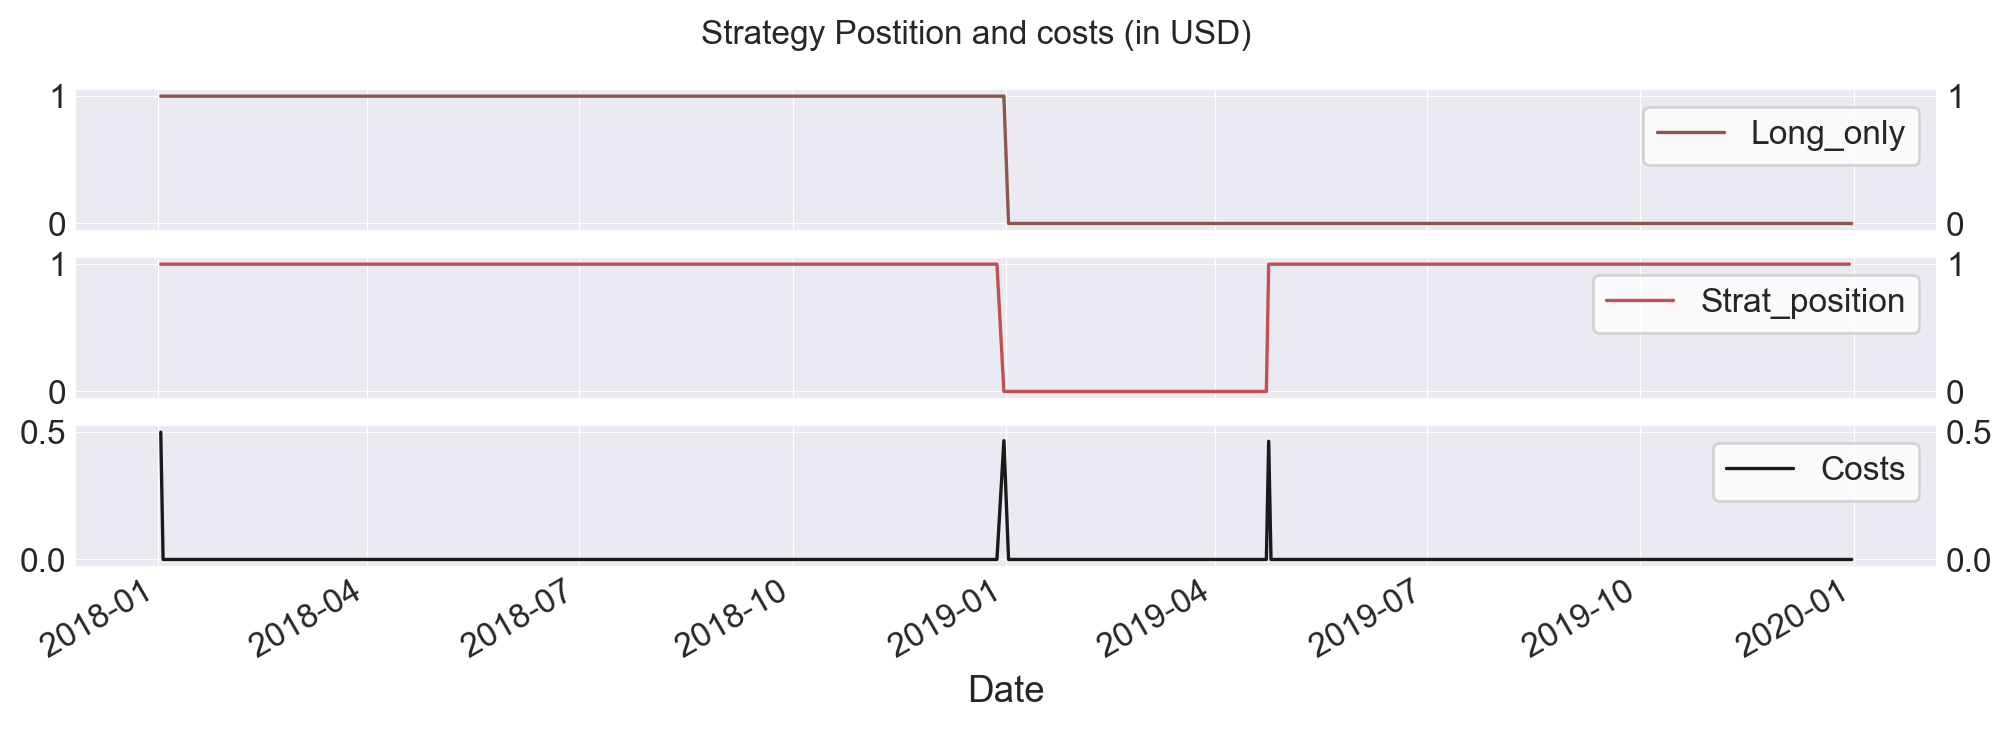

<AxesSubplot:title={'center':'Transaction Costs in USD (with more zoom)'}, xlabel='Date'>

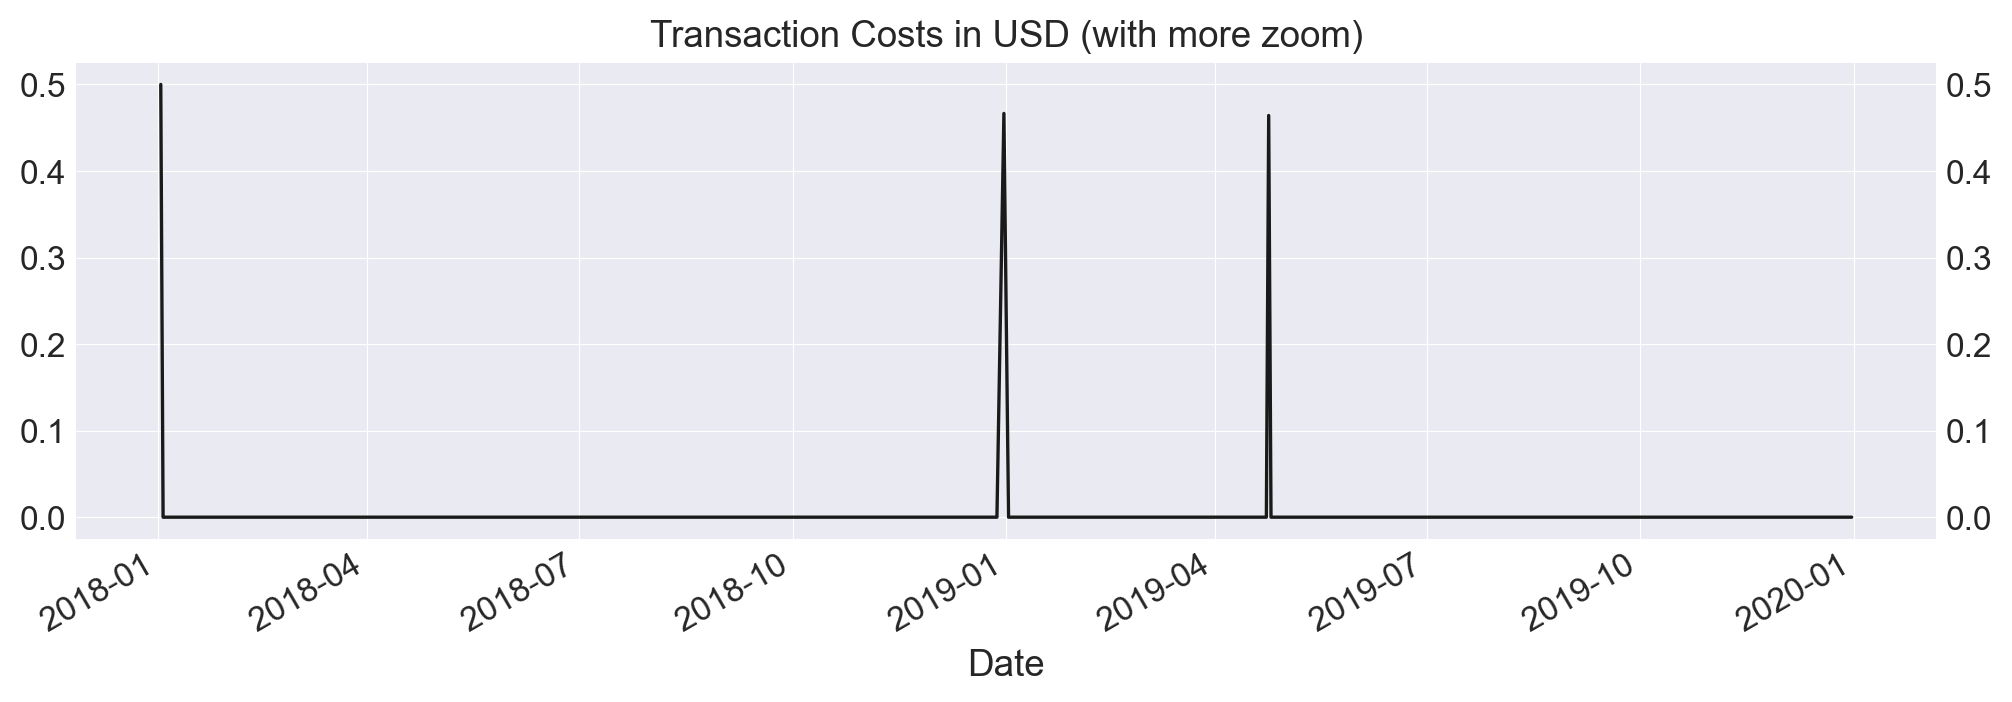

In [25]:
%run Functions.ipynb

results_df = prepare_oos_df(df.loc[first_day:last_day].copy(), commision=0.005)
show_oos_plot(results_df, legend=True)

print("Period: {:%Y-%m-%d} to {:%Y-%m-%d}".format(results_df.index[0], results_df.index[-1]))
print("\tOverall return of SP500: {:.2f} %. SR of SP500: {:.2f}".format(results_df['Market_cum_ret'][-1], results_df['Market_daily_ret'].sharpe()))
print("\tOverall return of our strategy: {:.2f} %. Sharpe ratio strategy: {:.2f}".format(results_df['Strat_cum_ret'][-1], results_df['Strat_cum_ret'].sharpe()))


cols = ['Long_only', 'Strat_position', 'Costs']
results_df[cols].plot(subplots=True, title='Strategy Postition and costs (in USD)', color=('tab:brown', 'r', 'k'))
plt.show()
results_df['Costs'].plot(title='Transaction Costs in USD (with more zoom)', color=('k'))

### Checking 'Strat_position' and 'Costs' of last days of year 1, and first days of year 2

The purpose of this section is to check how 'Strat_position' and 'Costs' have changed in the dataframe. More specifically, on dates:
1. Start of backtesting period: 'Costs' to open the position for the following day and its effect on 'Strat_cum_ret' should be shown
   
2. First days of 2019. Since we need to change the 'Strat_position' from long to being neutral, 'Costs' should be shown for closing the position. We can also see the change in 'Long_only' from 1 to 0.
3. At the end of 2019-04-23, there is an upward MA cross. 'Strat_position' and 'Costs' should change accordingly.

First two days: 
	We can see how we did not enter the market until the end of the first trading day.
	So the only returns from the first day come from transaction costs, that were added when we entered a long position
	Costs = $ 0.05, because commision was set to 0.05 in this test


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303         0.003262             1.0    0.5          1      100.830336     100.326184
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0          1      101.475531     100.968154

End of first OOS period and beginning of second OOS period:
	Following two dataframes allow to see how the transaction costs from the first day of second year is moved to the last day of the first year.
	(Because we change the position right before the close of the first year)

Original df:


Close  Market_daily_ret  Strat_daily_ret  Strat_position     Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                          
2018-12-28  2485.739990         -0.001242        -0.001242             1.0  0.000000          1       92.973167      92.962797
2018-12-31  2506.850098          0.008492         0.008492             NaN  0.000000          1       93.762740      93.752282
2019-01-02  2510.030029          0.001268        -0.000112             0.0  0.010471          0       93.881678      93.752282
2019-01-03  2447.889893         -0.024757         0.000000             0.0  0.000000          0       91.557475      93.752282

Fixed df:
	We can see how Strat_position and Costs were fixed properly from the original df to the fixed df:
		Costs (in USD) = previous(Strat_cum_ret) * [1+[Market_Daily_ret*previous(Strat_position)]] * commission
		Costs (in USD) = 91.746497 * (1+(0.008492*1.0)) * (0.005) = 0.462628


Close  Market_daily_ret  Strat_daily_ret  Strat_position    Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                         
2018-12-28  2485.739990         -0.001242        -0.001242             1.0  0.00000          1       92.973167      92.508301
2018-12-31  2506.850098          0.008492         0.003450             0.0  0.46647          1       93.762740      92.827457
2019-01-02  2510.030029          0.001268         0.000000             0.0  0.00000          0       93.881678      92.827457
2019-01-03  2447.889893         -0.024757         0.000000             0.0  0.00000          0       91.557475      92.827457

Change of strategy position (at the end of 2019-04-24): 
	There is a MA crossover at the 'Close' of 2019-04-24. A change in Strat_position should be shown, with a cost to be paid at the end of the day
		Costs (in USD) = previous(Strat_cum_ret) * [1+[Market_Daily_ret*previous(Strat_position)]] * commission
		Costs (in USD) = 92.063024 * (1+(-0.002192*0.0)) * (0.005) = 0.460315


Close  Market_daily_ret  Strat_daily_ret  Strat_position     Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                          
2019-04-22  2907.969971          0.001012         0.000000             0.0  0.000000          0      108.765671      92.827457
2019-04-23  2933.679932          0.008841         0.000000             0.0  0.000000          0      109.727291      92.827457
2019-04-24  2927.250000         -0.002192        -0.005000             1.0  0.464137          0      109.486794      92.363320
2019-04-25  2926.169922         -0.000369        -0.000369             1.0  0.000000          0      109.446397      92.329240

Last two days. We can see information about cummulative returns from the benchmark and out strategy. 
	We have NaN in 'Strat_position', because we have not decided a strategy position for the following OOS period



Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2019-12-30  3221.290039         -0.005781        -0.005781             1.0    0.0          0       120.48466     101.641145
2019-12-31  3230.780029          0.002946         0.002946             NaN    0.0          0       120.83961     101.940582

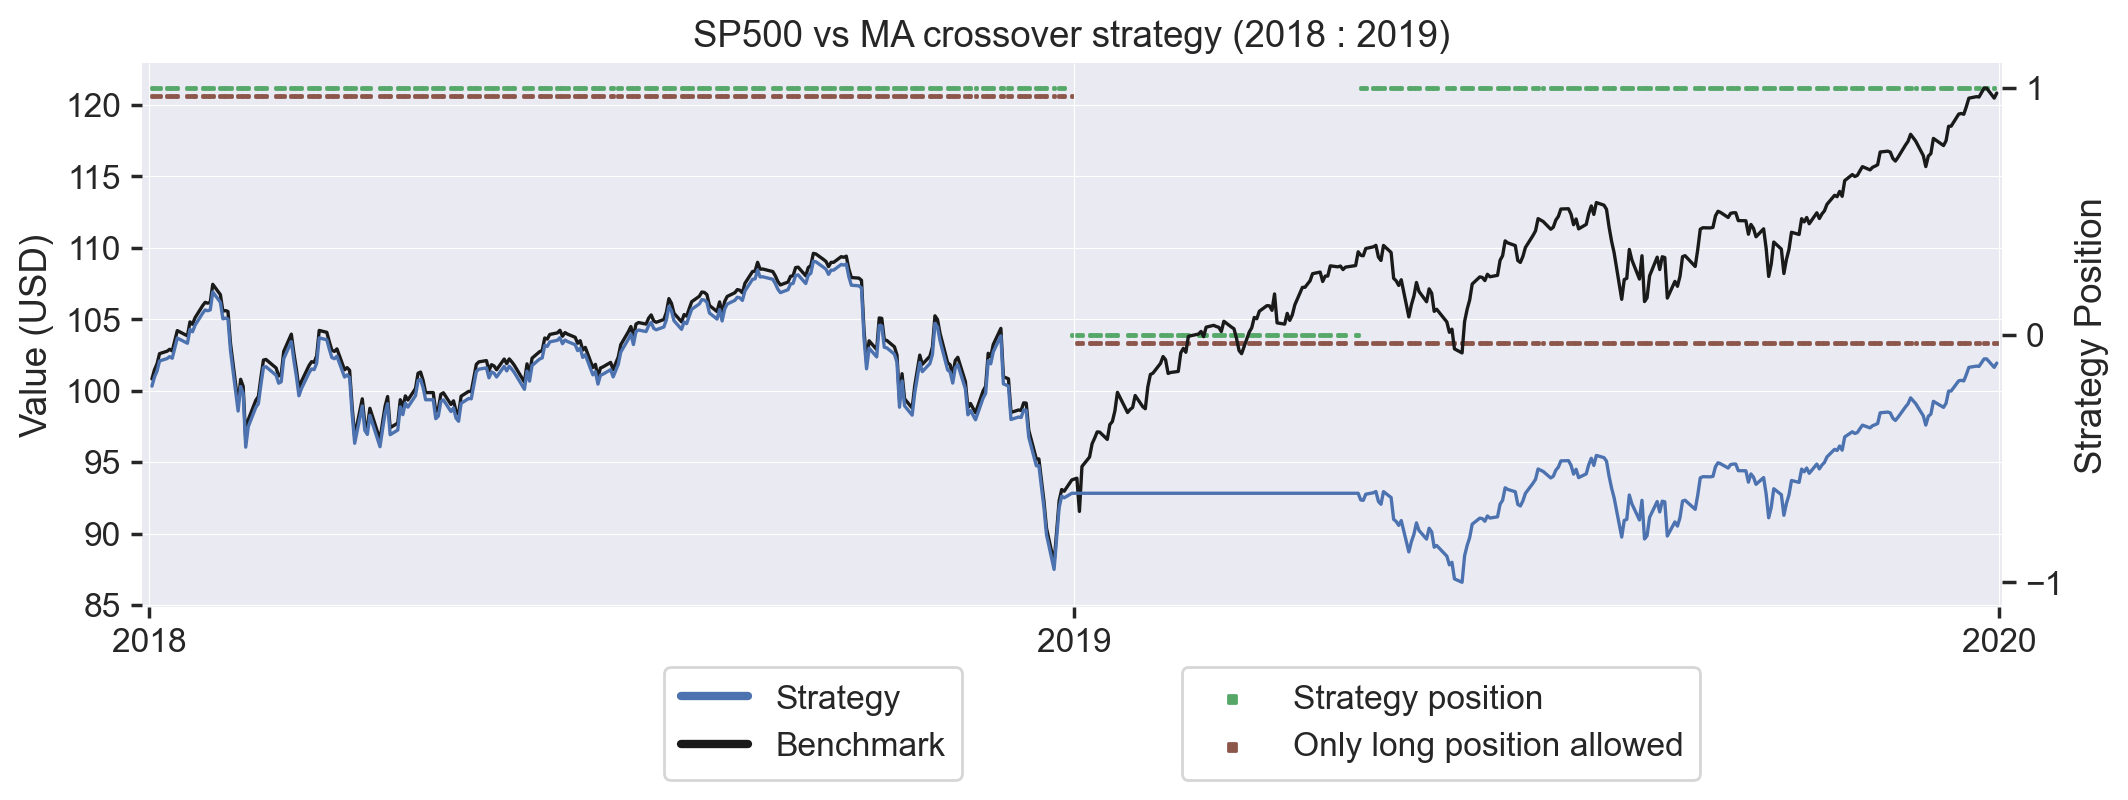

In [26]:
%run Functions.ipynb
results_df = prepare_oos_df(df.loc[first_day:last_day].copy(), commision=0.005)

last_day_2018 = results_df[str(first_day.year)].index[-1]
first_day_2019 = results_df[str(last_day.year)].index[0]

# df contains the output df from both backtests concatenated
# results_df contains the "fixed" df. 

print("First two days: \n\tWe can see how we did not enter the market until the end of the first trading day.\n\t"
        "So the only returns from the first day come from transaction costs, that were added when we entered a long position\n\t"
        "Costs = $ 0.05, because commision was set to 0.05 in this test")
results_df.head(2)

print("End of first OOS period and beginning of second OOS period:\n\t"
        "Following two dataframes allow to see how the transaction costs from the first day of second year is moved to the last day of the first year.\n\t"
        "(Because we change the position right before the close of the first year)\n")

print("Original df:")
df['2018-12-28':'2019-01-03']
print("Fixed df:\n\t"
        "We can see how Strat_position and Costs were fixed properly from the original df to the fixed df:\n\t"
        "\tCosts (in USD) = previous(Strat_cum_ret) * [1+[Market_Daily_ret*previous(Strat_position)]] * commission\n\t"
        "\tCosts (in USD) = 91.746497 * (1+(0.008492*1.0)) * (0.005) = 0.462628")
results_df['2018-12-28':'2019-01-03']


print("Change of strategy position (at the end of 2019-04-24): \n\tThere is a MA crossover at the 'Close' of 2019-04-24. A change in Strat_position should be shown,"
        " with a cost to be paid at the end of the day\n\t"
        "\tCosts (in USD) = previous(Strat_cum_ret) * [1+[Market_Daily_ret*previous(Strat_position)]] * commission\n\t"
        "\tCosts (in USD) = 92.063024 * (1+(-0.002192*0.0)) * (0.005) = 0.460315")

results_df.loc['2019-04-22':'2019-04-25']


print("Last two days. We can see information about cummulative returns from the benchmark and out strategy. \n\t"
        "We have NaN in 'Strat_position', because we have not decided a strategy position for the following OOS period\n")
#df.tail(2)
results_df.tail(2)

show_oos_plot(results_df, legend=True)

## Walk forward optimization. 

In [27]:
%run Functions.ipynb

# fast_ma_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
# slow_ma_list = [5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260]

fast_ma_list = [5, 10, 15, 20, 25, 30, 500, 500]
slow_ma_list = [50, 100, 150, 175, 200, 225, 250, 300]

IS_start_years = pd.date_range(start='2015-01-01', end='2016-01-01', freq='1YS', closed=None)
IS_end_years = pd.date_range(start='2017-12-31', end='2018-12-31', freq='1Y', closed=None)
OOS_start_years = pd.date_range(start='2018-01-01', end='2019-01-01', freq='1YS', closed=None)
OOS_end_years = pd.date_range(start='2018-12-31', end='2019-12-31', freq='1Y', closed=None)

# IS_start_years = pd.date_range(start='1997-01-01', end='2017-01-01', freq='1YS', closed=None)
# IS_end_years = pd.date_range(start='1999-12-31', end='2019-12-31', freq='1Y', closed=None)
# OOS_start_years = pd.date_range(start='2000-01-01', end='2020-01-01', freq='1YS', closed=None)
# OOS_end_years = pd.date_range(start='2000-12-31', end='2020-12-31', freq='1Y', closed=None)

print_periods(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years)

num_neighbors_matrix = get_num_neighbors(fast_ma_list, slow_ma_list)

	In SAMPLE		OOS
2015-01-01 : 2017-12-31 	 2018-01-01 : 2018-12-31
2016-01-01 : 2018-12-31 	 2019-01-01 : 2019-12-31
Number of periods: 2 : 2     2 : 2


Best In-sample performance: 
Period: 2015-01-02 to 2017-12-29
	Overall return of SP500: 129.86 %. IR of SP500: 0.71
	Overall return of long only: 129.86 %. IR strategy: 0.71. 
OOS performance:
Period: 2018-01-02 to 2018-12-31
	Overall return of SP500: 93.76 %. IR of SP500: -0.38
	Overall return of long only: 93.76 %. IR strategy: -0.38. 

Best In-sample performance: 
Period: 2016-01-04 to 2018-12-31
	Overall return of SP500: 122.65 %. IR of SP500: 0.52
	Overall return of 25-225 MA crossover: 137.20 %. IR strategy: 1.00
OOS performance:
Period: 2019-01-02 to 2019-12-31
	Overall return of SP500: 128.88 %. IR of SP500: 2.03
	Overall return of 25-225 MA crossover: 115.66 %. IR strategy: 1.32

End of Walk Forward Optimization
CPU times: user 2.1 s, sys: 68.2 ms, total: 2.17 s
Wall time: 2.18 s


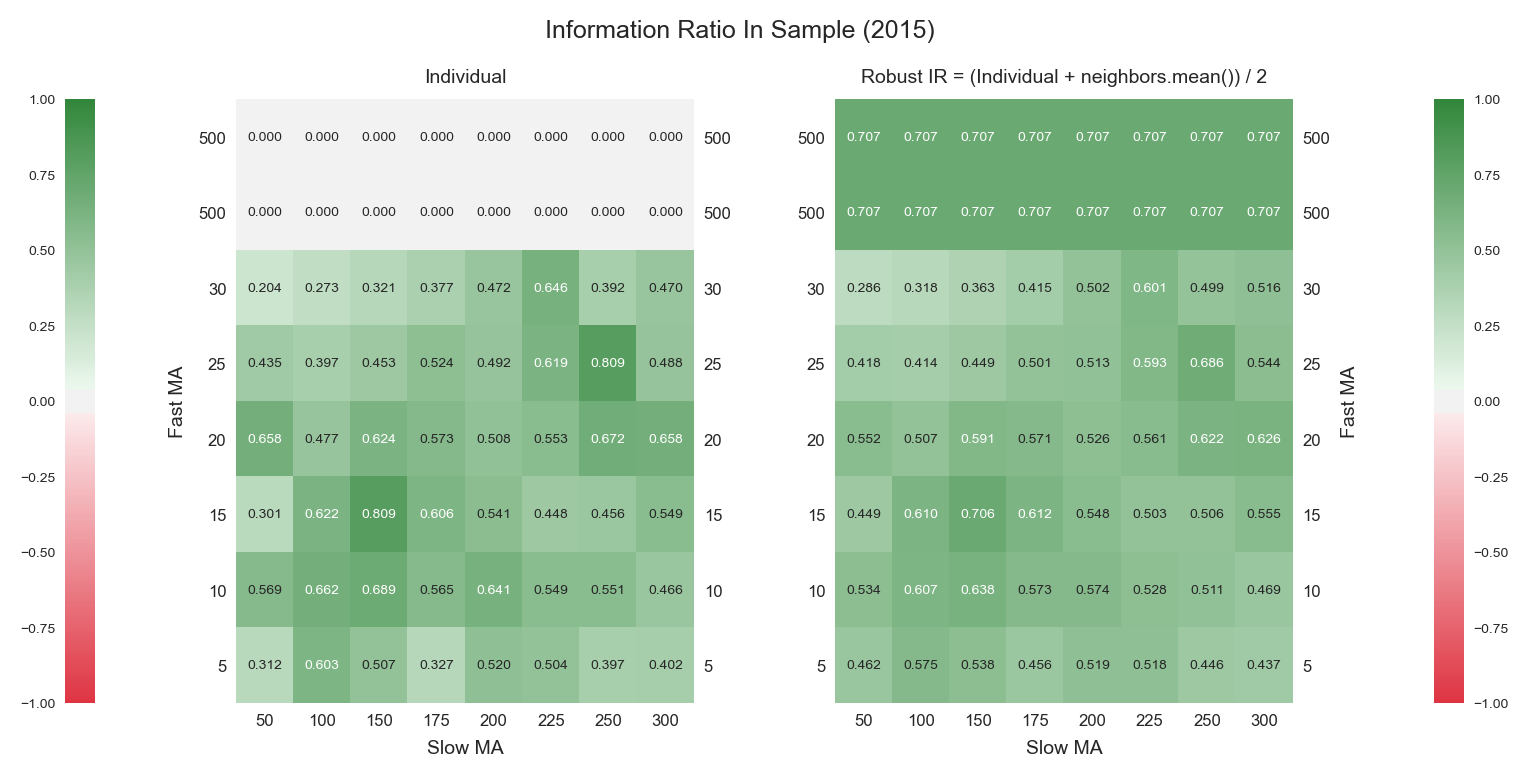

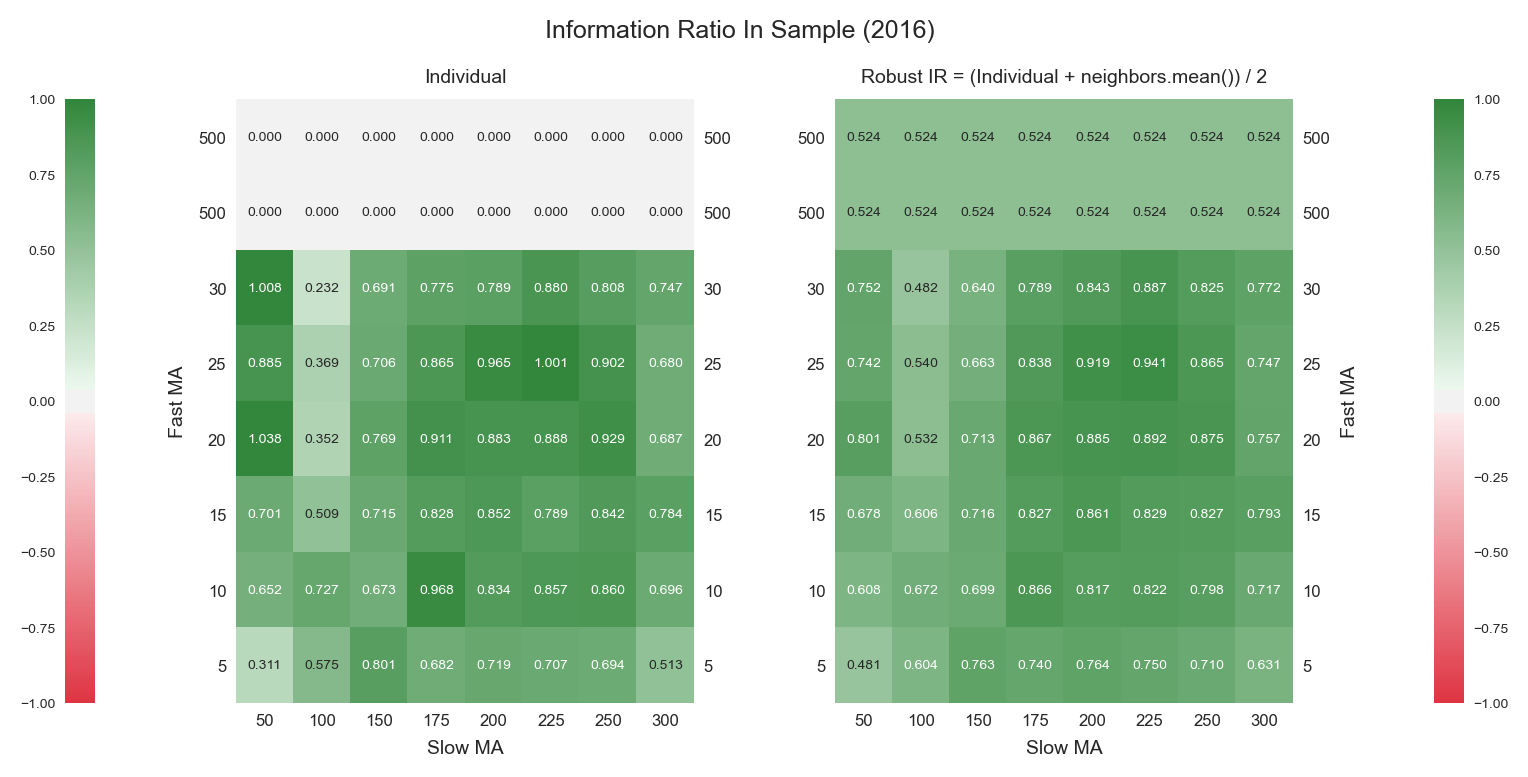

In [28]:
%%time
%run Functions.ipynb
df_walk_forward = data[IS_start_years[0]:OOS_end_years[-1]].copy()
df_walk_forward = df_walk_forward.loc[:'2020-05-02']

# Copy data and create necessary columns 
new_cols = ['Strat_daily_ret', 'Strat_position', 'Long_only', 'Costs', 'Market_cum_ret']

df_walk_forward = df_walk_forward.reindex(columns = df_walk_forward.columns.tolist() + new_cols)

last_position = 0 # We suppose that we start not being invested. 1:long, -1:short

optimization_results = []
robust_optimization_results = []
market_ir_list = []

num_loop=0
for IS_start, IS_end, OOS_start, OOS_end in zip(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years):
    #if num_loop == 2: break
    num_loop += 1
    
    results_ir = np.zeros((len(fast_ma_list),len(slow_ma_list)))
    results_pnl = np.zeros((len(fast_ma_list),len(slow_ma_list)))

    is_period = df_walk_forward.loc[IS_start:IS_end].copy()
    oos_period = df_walk_forward.loc[OOS_start:OOS_end].copy()
    
    ############################################ IN SAMPLE  ############################################
    results_pnl, results_ir, market_ir = run_all_combinations(is_period, fast_ma_list, slow_ma_list, last_position)
    title = "Individual SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
    #show_heatmap(results_ir, market_ir, plot_title=title, x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)
    optimization_results.append(results_ir)
    market_ir_list.append(market_ir)

    # Get index of maximum SR for the In-Sample period
    fast_index, slow_index, robust_results_ir = get_best_combination(market_ir, results_ir, num_neighbors_matrix, allow_long_only=False)
    title = "Robust SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
    #show_heatmap(robust_results_ir, market_ir, plot_title=title, x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)
    robust_optimization_results.append(robust_results_ir)
    
    print("Best In-sample performance: ")
    print_backtest_stats_ma(is_period, fast_ma_list[fast_index], slow_ma_list[slow_index],
                            ret_strat=results_pnl[fast_index, slow_index], ir_strat=results_ir[fast_index, slow_index],  
                           market_ir=market_ir)
    
    show_both_heatmaps(results_ir, robust_results_ir, market_ir, plot_title=str(IS_start.year), x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)    

    
    ############################################ OUT OF SAMPLE  ############################################
    print("OOS performance:")
    _, last_position, market_pnl, market_ir = backtest_strat_ma(oos_period, fast_ma=1, slow_ma=1, previous_position=0) # Market- always long
    _, last_position, strat_pnl, strat_ir = backtest_strat_ma(oos_period, fast_ma_list[fast_index], slow_ma_list[slow_index], previous_position=last_position)
    print_backtest_stats_ma(oos_period, fast_ma_list[fast_index], slow_ma_list[slow_index], strat_pnl, strat_ir, market_ir)  
    
    # Save come columns from OOS
    df_walk_forward.loc[OOS_start:OOS_end, new_cols] = oos_period[new_cols]
    print()

print("End of Walk Forward Optimization")

In [29]:
%run Functions.ipynb
from ipywidgets import widgets

options = [(year) for year in IS_start_years.year]

selection_slider = widgets.SelectionSlider(
    options=options,
    description='Starting IS year',
    orientation='horizontal',
    layout={'width': '900px'},
)
#selection_slider

def plot_heatmap(year):
    index = year - IS_start_years.year[0]
    show_both_heatmaps(optimization_results[index], robust_optimization_results[index], market_ir_list[index], plot_title=str(year), x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)    
    
widgets.interact(
    plot_heatmap,
    year=selection_slider
);

interactive(children=(SelectionSlider(description='Starting IS year', layout=Layout(width='900px'), options=(2…

Close  Market_daily_ret  Strat_daily_ret  Strat_position    Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                         
2018-01-02  2695.810059          0.008303         0.008191             1.0  0.29821        1.0     2695.810059    2695.509372
2019-12-31  3230.780029          0.002946         0.002946             NaN  0.00000        0.0     3230.780029    2902.682785

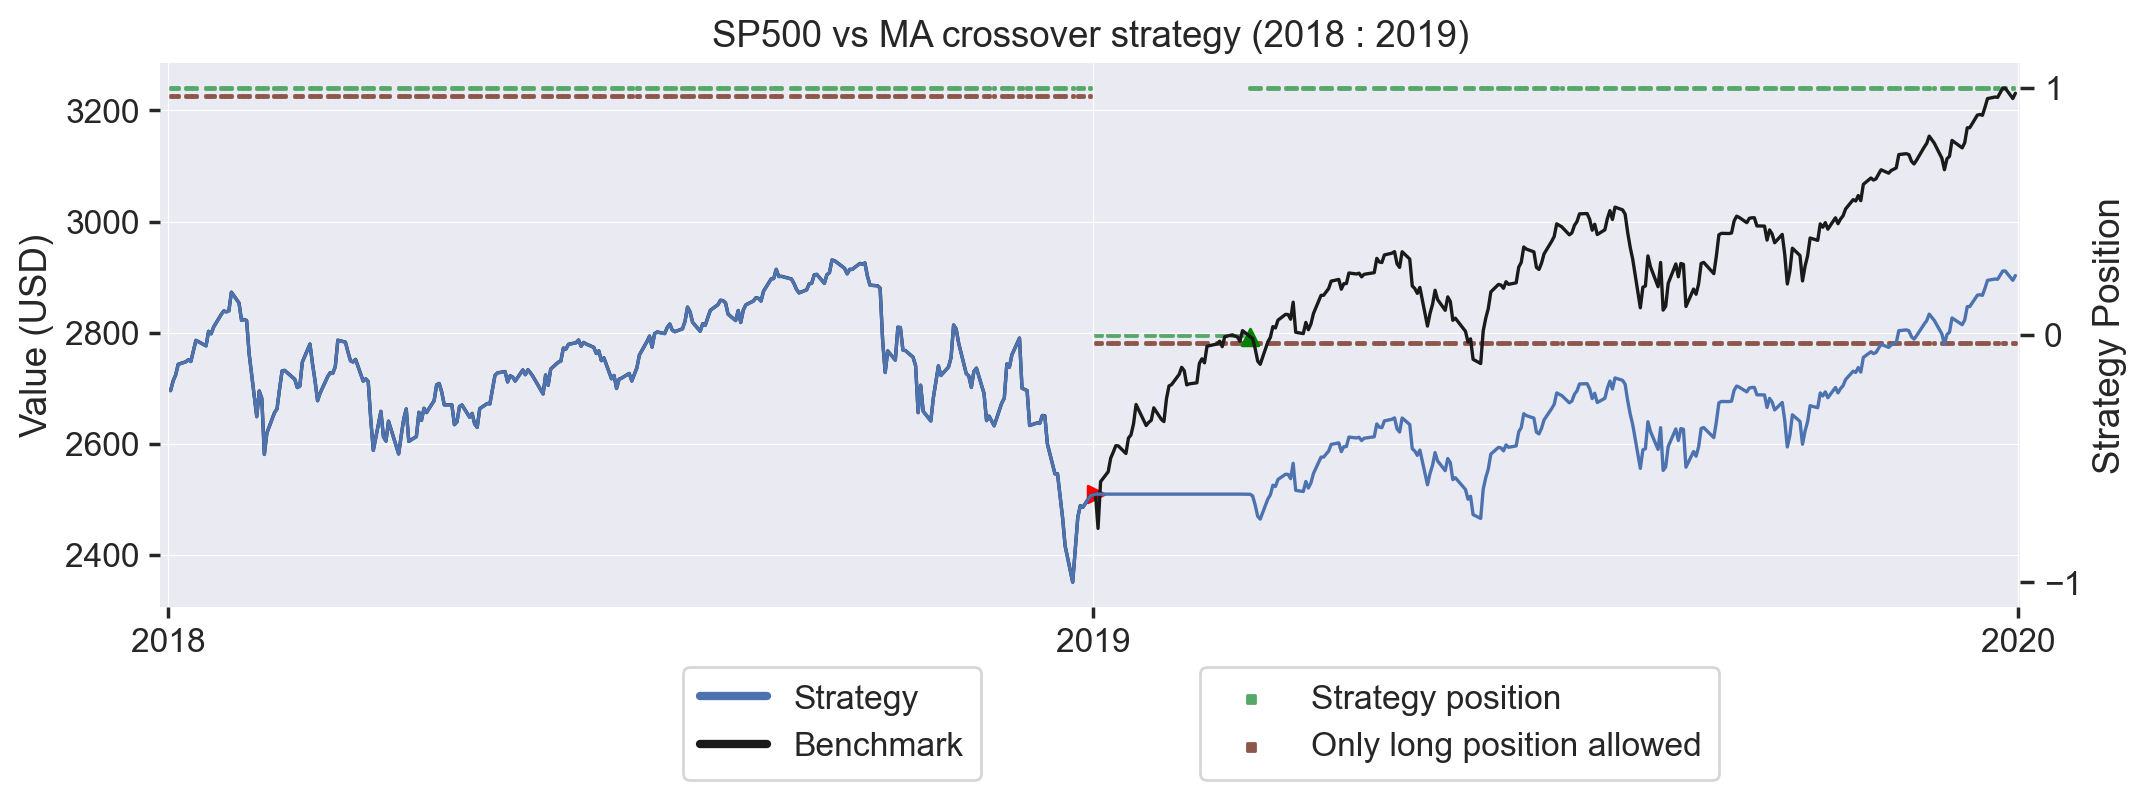

In [30]:
%run Functions.ipynb
ini_mon = df_walk_forward[str(OOS_start_years[0].year-1)].iloc[-1]['Close']
#ini_mon = 100
results_df = prepare_oos_df(df_walk_forward.loc[OOS_start_years[0]:OOS_end_years[-1]].copy(), ini_equity=ini_mon)
results_df.iloc[[0,-1]]
show_oos_plot(results_df, legend=True, with_signals=True)
#plt.show()
#results_df['Costs'].cumsum().plot();

## Save results

After the walk-forward optimization we save the results. The most important column is 'Strat_position'. From it, we can obtain daily and cummulative returns of the strategy.

In [31]:
filename = "Test_results_ma.csv"
# results_df.to_csv("data/{}".format(filename))

if filename not in os.listdir("data"):
    results_df.to_csv("data/{}".format(filename))
    print("File saved properly")
else:
    print("File already exists")
    

File already exists
